## Basic Libraries

In [1]:
import json
import statistics
import math

from collections import defaultdict

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

import warnings
warnings.filterwarnings("ignore")

# Exploring `anime.csv`

In [2]:
anime_df = pd.read_csv('D:\\Study Work\\Data Science\\Data Science Projects\\Otaku\\data\\anime_cleaned.csv')
print("Number of animes:", len(anime_df))
anime_df.head(2)

Number of animes: 7814


,id,title,start_date,synopsis,mean,popularity,num_list_users,num_scoring_users,nsfw,media_type,...,start_season_year,start_season_season,statistics_watching,statistics_completed,statistics_on_hold,statistics_dropped,statistics_plan_to_watch,statistics_num_list_users,positive_viewership_fraction,negative_viewership_fraction
0,21,One Piece,1999-10-20,Barely surviving in a barrel after passing thr...,8.72,17,2463199,1398717,white,tv,...,1999.0,fall,1746533.0,16.0,297039.0,195959.0,223517.0,2463064.0,0.7998,0.2002
1,3665,Ginga Eiyuu Densetsu Gaiden (1999),1999-12-24,Ginga Eiyuu Densetsu Gaiden (1999) is the seco...,8.06,4962,21077,7777,white,ova,...,1999.0,fall,983.0,9594.0,749.0,399.0,9347.0,21072.0,0.9455,0.0545


#### Features

In [3]:
print("Features:")
print("---------")

for header in anime_df.columns:
    print(header)

Features:
---------
id
title
start_date
synopsis
mean
popularity
num_list_users
num_scoring_users
nsfw
media_type
status
genres
num_episodes
source
average_episode_duration
rating
studios
season
year
end_date
broadcast_day_of_the_week
broadcast_start_time
start_season_year
start_season_season
statistics_watching
statistics_completed
statistics_on_hold
statistics_dropped
statistics_plan_to_watch
statistics_num_list_users
positive_viewership_fraction
negative_viewership_fraction


#### Convert `studios` and `genres` features to json for exploration

In [4]:
### FOR THE REVIEWS COLUMN AS THE DATA IS FLOAT
def json_studios_float(data_clean):
    # Convert studios string to json
    for row in range(0, len(data_clean)):
        studio_data = data_clean['studios'][row]
        
        if not studio_data:  # Skip empty or None values
            data_clean['studios'][row] = None
            continue
        
        if isinstance(studio_data, list):  # If it's already a list, no need to parse
            data_clean['studios'][row] = studio_data
            continue
        
        # Ensure studio_data is a string before attempting to replace
        if isinstance(studio_data, str):
            try:
                studios = json.loads(studio_data.replace("'", "\""))
            except json.JSONDecodeError:
                try:
                    # Attempt to fix potential common formatting errors
                    studios = json.loads(studio_data.replace("'", "\"").replace("\"s", "'s").replace('N\"', "N\'"))
                except json.JSONDecodeError as e:
                    print(f"JSONDecodeError at row {row}: {studio_data}")  # Log the error and data for debugging
                    data_clean['studios'][row] = None
                    continue  # Continue with the next row
        else:
            data_clean['studios'][row] = None  # Handle non-string values, like floats, as None
        
        data_clean['studios'][row] = studios
    
    return data_clean

def json_genres(data_clean):
    # Convert genres string to json
    for row in range(0, len(data_clean)):
        genre_str = data_clean['genres'][row]
        
        # If it's a list, convert it directly
        if isinstance(genre_str, list):
            data_clean['genres'][row] = genre_str
        elif isinstance(genre_str, str):
            # If it's a string, replace single quotes with double quotes and convert to JSON
            genre_str = genre_str.replace("'", "\"")
            # Check for empty strings or invalid JSON format
            if genre_str.strip():
                try:
                    genres = json.loads(genre_str)
                    data_clean['genres'][row] = genres
                except json.JSONDecodeError:
                    print(f"Invalid JSON format at row {row}: {genre_str}")
            else:
                print(f"Empty string at row {row}")
        else:
            print(f"Unexpected type at row {row}: {type(genre_str)}")
                
    return data_clean


In [5]:
# convert to json
anime_df = json_studios_float(anime_df)
anime_df = json_genres(anime_df)

Invalid JSON format at row 6325: finished_airing
Invalid JSON format at row 6592: finished_airing
Invalid JSON format at row 7090: finished_airing


In [6]:
# Drop rows with specific indices (6325, 6592, 7090)
invalid_rows = [6325, 6592, 7090]
anime_df = anime_df[~anime_df.index.isin(invalid_rows)]

## Exploring `genre`

In [7]:
from collections import defaultdict

genres_dict = defaultdict(int)

# getting the genres count from 2000 to 2023
for genres in anime_df['genres']:
    for genre in genres:
        genres_dict[genre['name']] += 1

# printing out the genre counts
for genre, count in genres_dict.items():
    print(f'{genre}: {count}')


Action: 2393
Adventure: 1973
Fantasy: 1990
Shounen: 1572
Adult Cast: 333
Drama: 1140
Military: 324
Sci-Fi: 1292
Space: 217
Comedy: 3310
Detective: 219
Gag Humor: 186
Delinquents: 21
School: 1012
Workplace: 76
Mystery: 532
Music: 974
Romance: 844
Shoujo: 335
Showbiz: 23
Kids: 1119
Childcare: 52
Suspense: 205
Mecha: 486
Super Power: 297
Seinen: 605
Slice of Life: 613
Avant Garde: 68
Award Winning: 188
Historical: 529
Psychological: 204
Ecchi: 250
Parody: 307
Isekai: 154
Mahou Shoujo: 173
Anthropomorphic: 259
Racing: 104
Martial Arts: 278
Samurai: 112
Medical: 24
Horror: 152
Supernatural: 614
Harem: 117
Mythology: 279
Vampire: 77
Gore: 118
Survival: 29
Reincarnation: 35
Iyashikei: 107
Performing Arts: 56
Strategy Game: 232
Pets: 57
Gourmet: 77
Sports: 334
Combat Sports: 39
Video Game: 63
Visual Arts: 43
Boys Love: 24
Love Polygon: 77
Time Travel: 75
CGDCT: 108
Educational: 28
Team Sports: 147
Otaku Culture: 48
Idols (Female): 148
Reverse Harem: 30
Organized Crime: 65
Girls Love: 36
High S

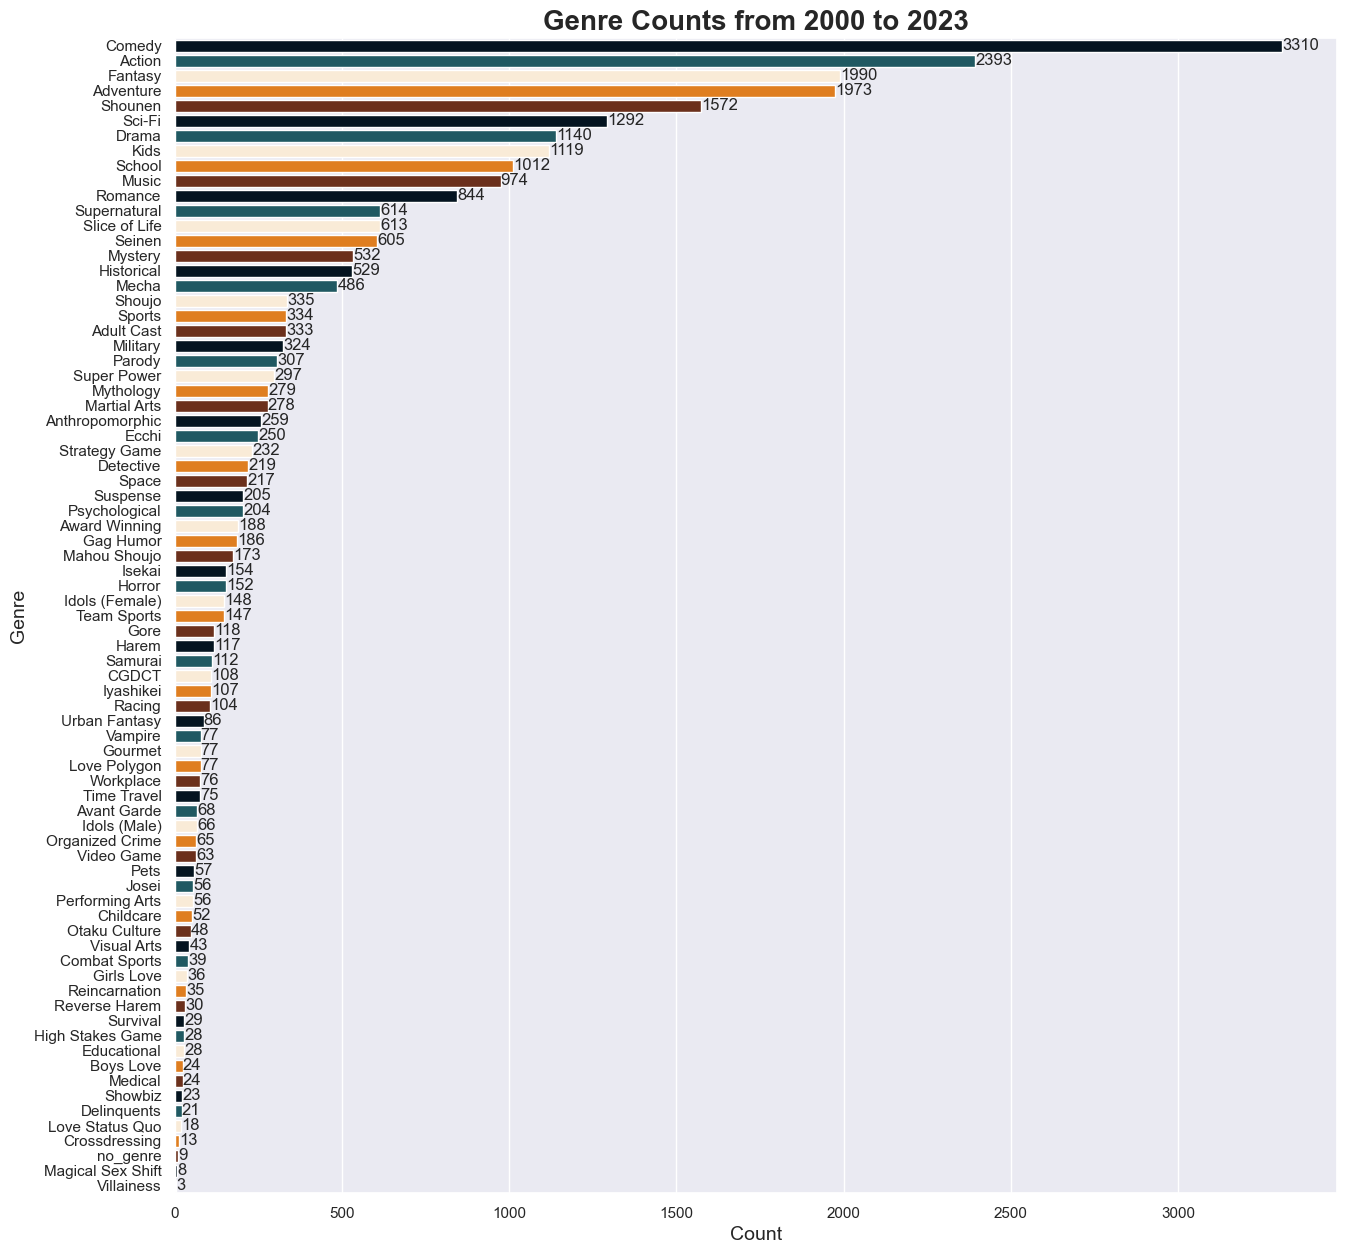

In [8]:
genre_df = pd.DataFrame(genres_dict.items())
genre_df.rename(columns={0: 'genre', 1: 'count'}, inplace=True)
genre_df = genre_df.sort_values(['count'], ascending=False).reset_index(drop=True)

plt.figure(figsize=(15, 15))

rocket_colors = ['#001524', '#15616d', '#ffecd1', '#ff7d00', '#78290f']

ax = sb.barplot(
    x="count", 
    y="genre", 
    data=genre_df, 
    estimator=sum, 
    ci=None, 
    palette=rocket_colors
)

plt.title("Genre Counts from 2000 to 2023", fontsize=20, fontweight='bold')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Genre", fontsize=14)

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_width())}', 
        (p.get_width() + 0.5, p.get_y() + p.get_height() / 2), 
        ha='left', 
        va='center', 
        fontsize=12
    )

plt.show()


* It can be seen that `Comedy` is the genres that most anime have
* The top 5 genres commonly seen are `Comedy`, `Action`, `Fantasy`, `Adventure`, and `Shounen`

#### anime with no genre

In [9]:
no_genre_df = anime_df[0:0]
error_rows = []

# Extracting animes with no genres into a dataframe
for row in range(0, len(anime_df)):
    try:
        genres = anime_df['genres'][row]
        
        # Check if genres is a list and if the first element has a 'name' field
        if isinstance(genres, list) and len(genres) > 0 and genres[0].get('name') == 'no_genre':
            no_genre_df = pd.concat([no_genre_df, pd.DataFrame([anime_df.iloc[row]])], ignore_index=True)
    except Exception:
        error_rows.append(row)

# Display cleaned DataFrame
no_genre_df


,id,title,start_date,synopsis,mean,popularity,num_list_users,num_scoring_users,nsfw,media_type,...,start_season_year,start_season_season,statistics_watching,statistics_completed,statistics_on_hold,statistics_dropped,statistics_plan_to_watch,statistics_num_list_users,positive_viewership_fraction,negative_viewership_fraction
0,6368,Legend of Regios,2009-03-27,Legend of Regios was originally the English sp...,6.39,6439,10867,2885,white,special,...,2009.0,winter,425.0,4536.0,221.0,231.0,5450.0,10863.0,0.9584,0.0416
1,32644,Yaseruyagi,2010-03-28,"A story about granny, her granddaughter and a ...",5.13,16439,538,263,white,ona,...,2010.0,winter,13.0,377.0,3.0,59.0,86.0,538.0,0.8848,0.1152
2,31068,Hime Chen! Otogi Chikku Idol Lilpri (2011),2011-04-06,Short episodes of Hime Chen! Otogi Chikku Idol...,6.74,10460,2951,1247,white,tv,...,2011.0,spring,126.0,1828.0,74.0,194.0,729.0,2951.0,0.9092,0.0908
3,31068,Hime Chen! Otogi Chikku Idol Lilpri (2011),2011-04-06,Short episodes of Hime Chen! Otogi Chikku Idol...,6.74,10460,2951,1247,white,tv,...,2011.0,spring,126.0,1828.0,74.0,194.0,729.0,2951.0,0.9092,0.0908
4,31068,Hime Chen! Otogi Chikku Idol Lilpri (2011),2011-04-06,Short episodes of Hime Chen! Otogi Chikku Idol...,6.74,10460,2951,1247,white,tv,...,2011.0,spring,126.0,1828.0,74.0,194.0,729.0,2951.0,0.9092,0.0908
5,35623,Si Ling Bianma: Shijie Caozong Zhe Recap,2014-05-08,Recap episode of Si Ling Bianma: Zhi Shijie Ca...,5.46,17688,419,118,white,ona,...,2014.0,spring,36.0,184.0,10.0,51.0,138.0,419.0,0.8544,0.1456
6,35680,Time Driver: Bokura ga Kaita Mirai,2018-03-10,Part of Anime Tamago 2018.,6,12868,1393,237,white,movie,...,2018.0,winter,29.0,356.0,19.0,63.0,926.0,1393.0,0.9411,0.0589
7,40238,Yumemi no E,2019-08-23,The painter Kuwagata Keisai lived over 200 yea...,6.18,15248,710,206,white,movie,...,2019.0,summer,37.0,279.0,11.0,62.0,320.0,709.0,0.8970,0.1030
8,37096,Puzzle & Dragon,2018-04-02,The story is set in modern day Japan following...,5.84,12294,1677,145,white,tv,...,2018.0,spring,323.0,1.0,78.0,283.0,990.0,1675.0,0.7845,0.2155


#### award winning genre

In [10]:
award_winning_df = anime_df[0:0]

# Extracting animes with 'Award Winning' genre into a dataframe
for row in anime_df.iterrows():
    row_idx, row_data = row
    genres = row_data['genres']
    
    if isinstance(genres, list):
        for genre in genres:
            if genre.get('name') == 'Award Winning':
                award_winning_df = pd.concat([award_winning_df, pd.DataFrame([row_data])], ignore_index=True)

print('-> Number of animes with "Award Winning" genre:', len(award_winning_df))

award_winning_df


-> Number of animes with "Award Winning" genre: 188


,id,title,start_date,synopsis,mean,popularity,num_list_users,num_scoring_users,nsfw,media_type,...,start_season_year,start_season_season,statistics_watching,statistics_completed,statistics_on_hold,statistics_dropped,statistics_plan_to_watch,statistics_num_list_users,positive_viewership_fraction,negative_viewership_fraction
0,2649,Doraemon: Obaachan no Omoide,2000-03-04,Nobita misses his granny that died a few years...,7.35,9438,4084,2248,white,movie,...,2000.0,winter,68.0,3206.0,49.0,137.0,622.0,4082.0,0.9544,0.0456
1,593,Mugen no Ryvius,1999-10-06,The year is AD 2225. Kouji Aiba and Aoi House...,7.41,3419,46124,12968,white,tv,...,1999.0,fall,2274.0,14911.0,1910.0,1776.0,25247.0,46118.0,0.9201,0.0799
2,95,Turn A Gundam,1999-04-09,"It is the Correct Century, two millennia after...",7.78,3225,51222,18221,white,tv,...,1999.0,spring,3722.0,21202.0,2999.0,1912.0,21383.0,51218.0,0.9041,0.0959
3,4459,Ojarumaru,1998-10-05,"In the Heian era, around 1000 years ago, a you...",6.39,11456,2195,551,white,tv,...,1998.0,fall,651.0,0.0,254.0,612.0,676.0,2193.0,0.6051,0.3949
4,570,Jin-Rou,2000-06-03,"In an alternate history, following World War I...",7.78,1322,189895,82026,white,movie,...,2000.0,spring,5644.0,102903.0,1801.0,946.0,78585.0,189879.0,0.9855,0.0145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,4459,Ojarumaru,1998-10-05,"In the Heian era, around 1000 years ago, a you...",6.39,11456,2195,551,white,tv,...,1998.0,fall,651.0,0.0,254.0,612.0,676.0,2193.0,0.6051,0.3949
184,39938,Inu-Ou,2022-05-28,After diving for an ancient sword in the water...,7.79,4133,31811,9895,white,movie,...,2022.0,spring,963.0,12060.0,363.0,221.0,18199.0,31806.0,0.9816,0.0184
185,50265,Spy x Family,2022-04-09,"Corrupt politicians, frenzied nationalists, an...",8.49,63,1672181,1024871,white,tv,...,2022.0,spring,237628.0,1206106.0,30992.0,26427.0,170901.0,1672054.0,0.9657,0.0343
186,52034,"""Oshi no Ko""",2023-04-12,"In the entertainment world, celebrities often ...",8.6,203,896471,525653,white,tv,...,2023.0,spring,146513.0,547954.0,18518.0,25844.0,157496.0,896325.0,0.9505,0.0495


#### comparision between no genre anime and award winning anime

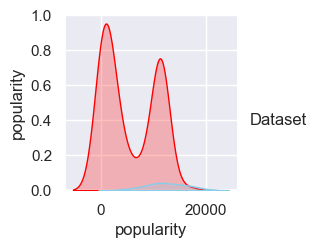

In [11]:
## POPULARITY DISTRIBUTION
sb.set(style="darkgrid")

# Create a 'category' column to distinguish between datasets
no_genre_df['Dataset'] = 'No genre'
award_winning_df['Dataset'] = 'Award Winning'

# Combine the datasets for easy comparison
combined_df = pd.concat([no_genre_df[['popularity', 'Dataset']], award_winning_df[['popularity', 'Dataset']]])

# Create a pairplot to compare distributions
sb.pairplot(combined_df, hue='Dataset', palette={"No genre": "skyblue", "Award Winning": "red"})

# Show the plot
plt.show()

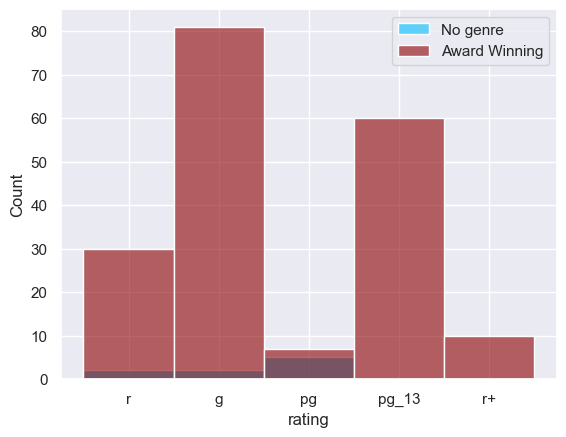

In [12]:
### COMPARING RANKs

sb.set(style="darkgrid")

sb.histplot(data=no_genre_df, x="rating", color="deepskyblue", label="No genre", kde=False, alpha=0.6)
sb.histplot(data=award_winning_df, x="rating", color="darkred", label="Award Winning", kde=False, alpha=0.6)

plt.legend()
plt.show()


#### Exploring genres trend from 2000 to 2023



In [18]:
# Import genres timeseries dataframe
genres_time_series_df = pd.read_csv('D:\\Study Work\\Data Science\\Data Science Projects\\Otaku\\data\\genres_timeseries_cleaned.csv')
genres_time_series_df.head()

,Start Season Year,Educational,Parody,Team Sports,no_genre,Iyashikei,Love Polygon,Kids,Pets,Supernatural,...,School,Comedy,Childcare,Josei,Workplace,Gourmet,Shounen,Urban Fantasy,Mystery,High Stakes Game
0,1999.0,0,2,0,0,0,0,55,0,1,...,4,86,0,0,3,0,91,0,15,0
1,2000.0,1,11,0,0,1,16,94,5,24,...,14,146,12,0,0,1,79,0,18,0
2,2001.0,2,10,8,0,0,2,70,7,22,...,40,143,1,0,1,0,69,0,12,2
3,2002.0,0,10,10,0,1,6,46,4,31,...,37,196,0,0,1,3,85,0,35,0
4,2003.0,0,11,2,0,1,2,40,1,29,...,14,144,1,3,2,0,86,0,20,0


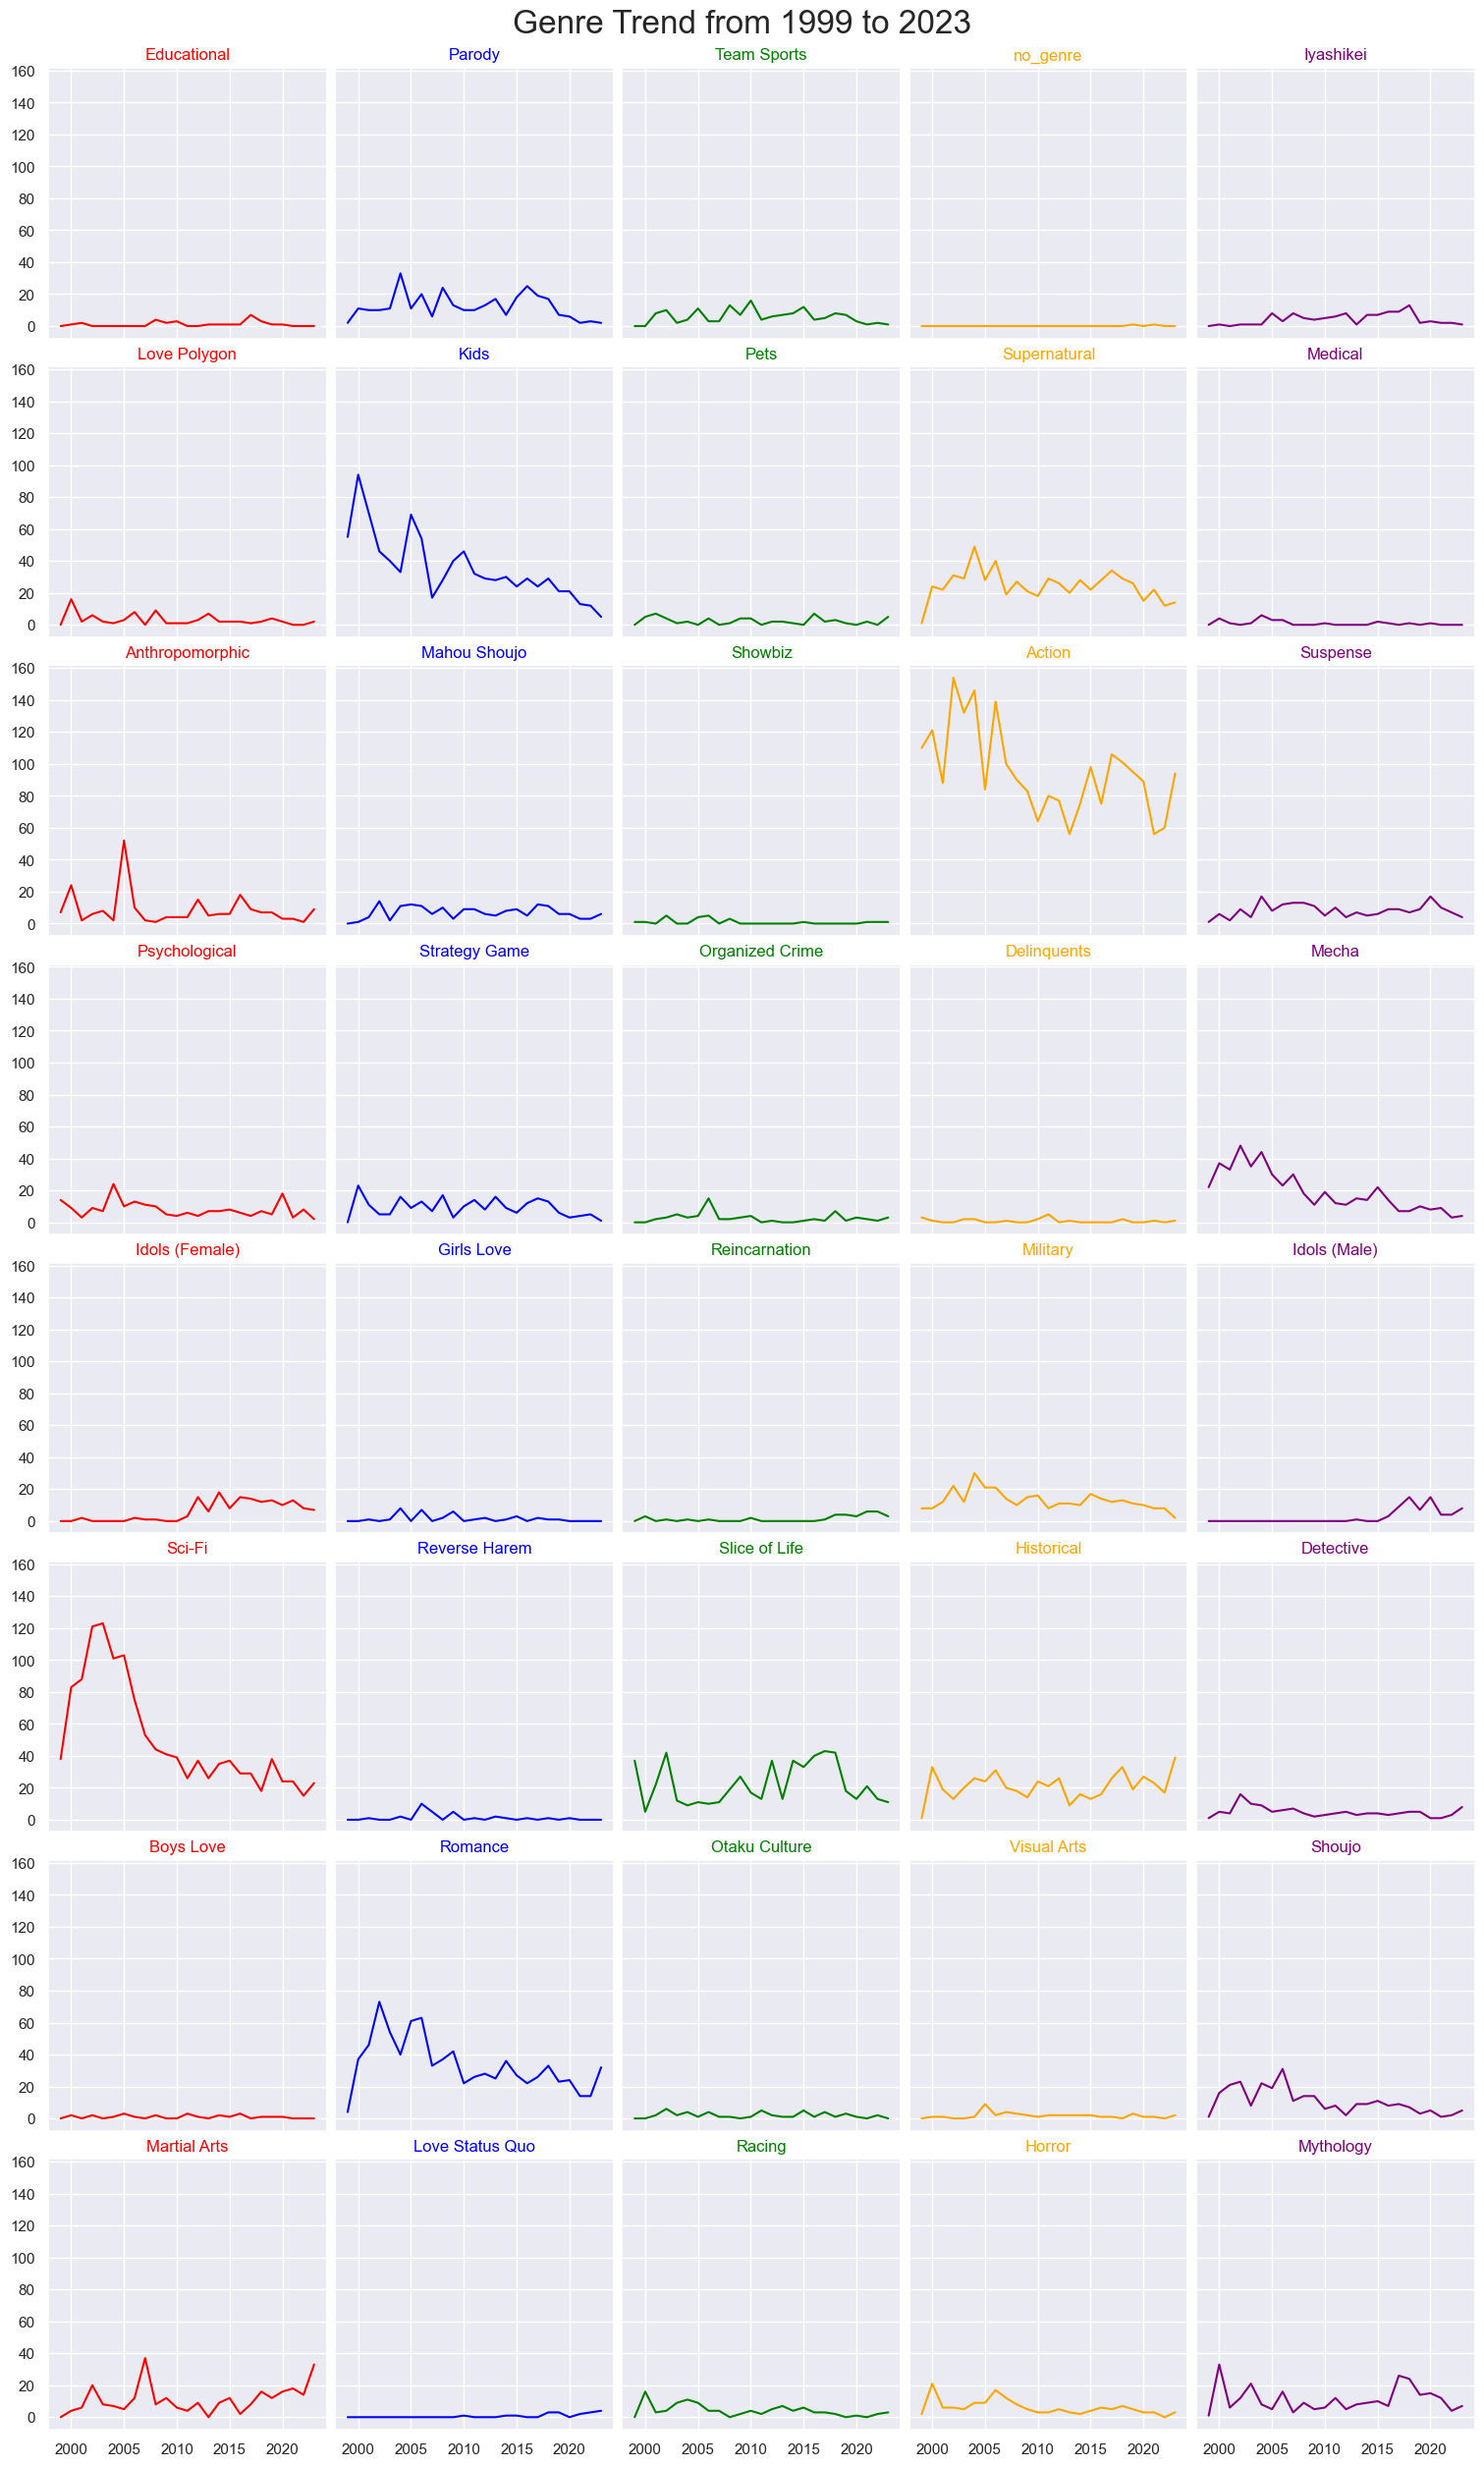

In [23]:
sb.set_theme()

colors = ['red', 'blue', 'green', 'orange', 'purple']

# Number of rows and columns
rows = 8
cols = 5

# Check if there are more genres than the number of subplots
total_plots = rows * cols
genres_list = list(genres_time_series_df.columns)[1:]


genres_list = genres_list[:total_plots]

fig, axs = plt.subplots(rows, cols, figsize=(15, 25), sharey=True, sharex=True, constrained_layout=True)
fig.suptitle('Genre Trend from 1999 to 2023', fontsize=24)


for idx, genre in enumerate(genres_list):
    row = idx // cols
    col = idx % cols 
    
    axs[row, col].plot('Start Season Year', genre, data=genres_time_series_df, color=colors[col % len(colors)])
    axs[row, col].set_title(f'{genre}', color=colors[col % len(colors)])


for idx in range(len(genres_list), total_plots):
    row = idx // cols
    col = idx % cols
    axs[row, col].axis('off')

# show the graph
plt.show()

## Exploring `studios`

In [24]:
studios_df = pd.DataFrame(anime_df['studios'])
studios_df.head()

,studios
0,"[{'id': 18, 'name': 'Toei Animation'}]"
1,"[{'id': 1269, 'name': 'K-Factory'}]"
2,"[{'id': 36, 'name': 'Gallop'}]"
3,"[{'id': 22, 'name': 'Nippon Animation'}]"
4,"[{'id': 1, 'name': 'Pierrot'}]"


In [29]:
invalid_rows = [6325, 6592, 7090]
studios_df = studios_df[~studios_df.index.isin(invalid_rows)]

In [31]:
studios_df.reset_index(drop=True, inplace=True)

# Create a dictionary to count the frequency of each producer
studios_dict = defaultdict(int)

# Iterate over rows using iterrows
for index, row in studios_df.iterrows():
    for studio in row['studios']:
        studios_dict[studio['name']] += 1

# Print out the studio counts
for studio, count in studios_dict.items():
    print(f'{studio}: {count}')

Toei Animation: 398
K-Factory: 3
Gallop: 166
Nippon Animation: 167
Pierrot: 224
Studio Hibari: 50
Sunrise: 338
Trans Arts: 33
TMS Entertainment: 352
Ajia-do: 91
Gakken: 56
VAP: 7
Satelight: 78
Shin-Ei Animation: 310
Tokyo Movie: 13
Zuiyo: 9
J.C.Staff: 194
Group TAC: 42
Madhouse: 269
Xebec: 132
OLM: 248
Eiken: 65
SBS TV Production: 9
PP Project: 2
Studio Kikan: 29
Actas: 53
Bee Train: 31
Studio Bogey: 7
Milky Cartoon: 9
AIC: 37
dwarf: 41
Tezuka Productions: 32
Studio Deen: 181
APPP: 13
Anon Pictures: 2
Garyuu Studio: 1
Yumeta Company: 20
Robot Communications: 22
Asahi Production: 12
Production I.G: 205
Gainax: 27
Plum: 5
Tatsunoko Production: 81
Studio D-Volt: 1
E&G Films: 9
Dongwoo A&E: 41
HAL Film Maker: 35
Triangle Staff: 2
Bones: 113
Studio Live: 4
Gonzo: 104
Studio Flag: 7
Sovat Theater: 2
Chaos Project: 7
Ashi Productions: 14
Brain's Base: 64
Anima: 6
Vega Entertainment: 11
Shaft: 68
Radix: 28
Studio OX: 2
Phoenix Entertainment: 1
animate Film: 1
SIDO LIMITED: 1
JCF: 2
Pastel: 2
T

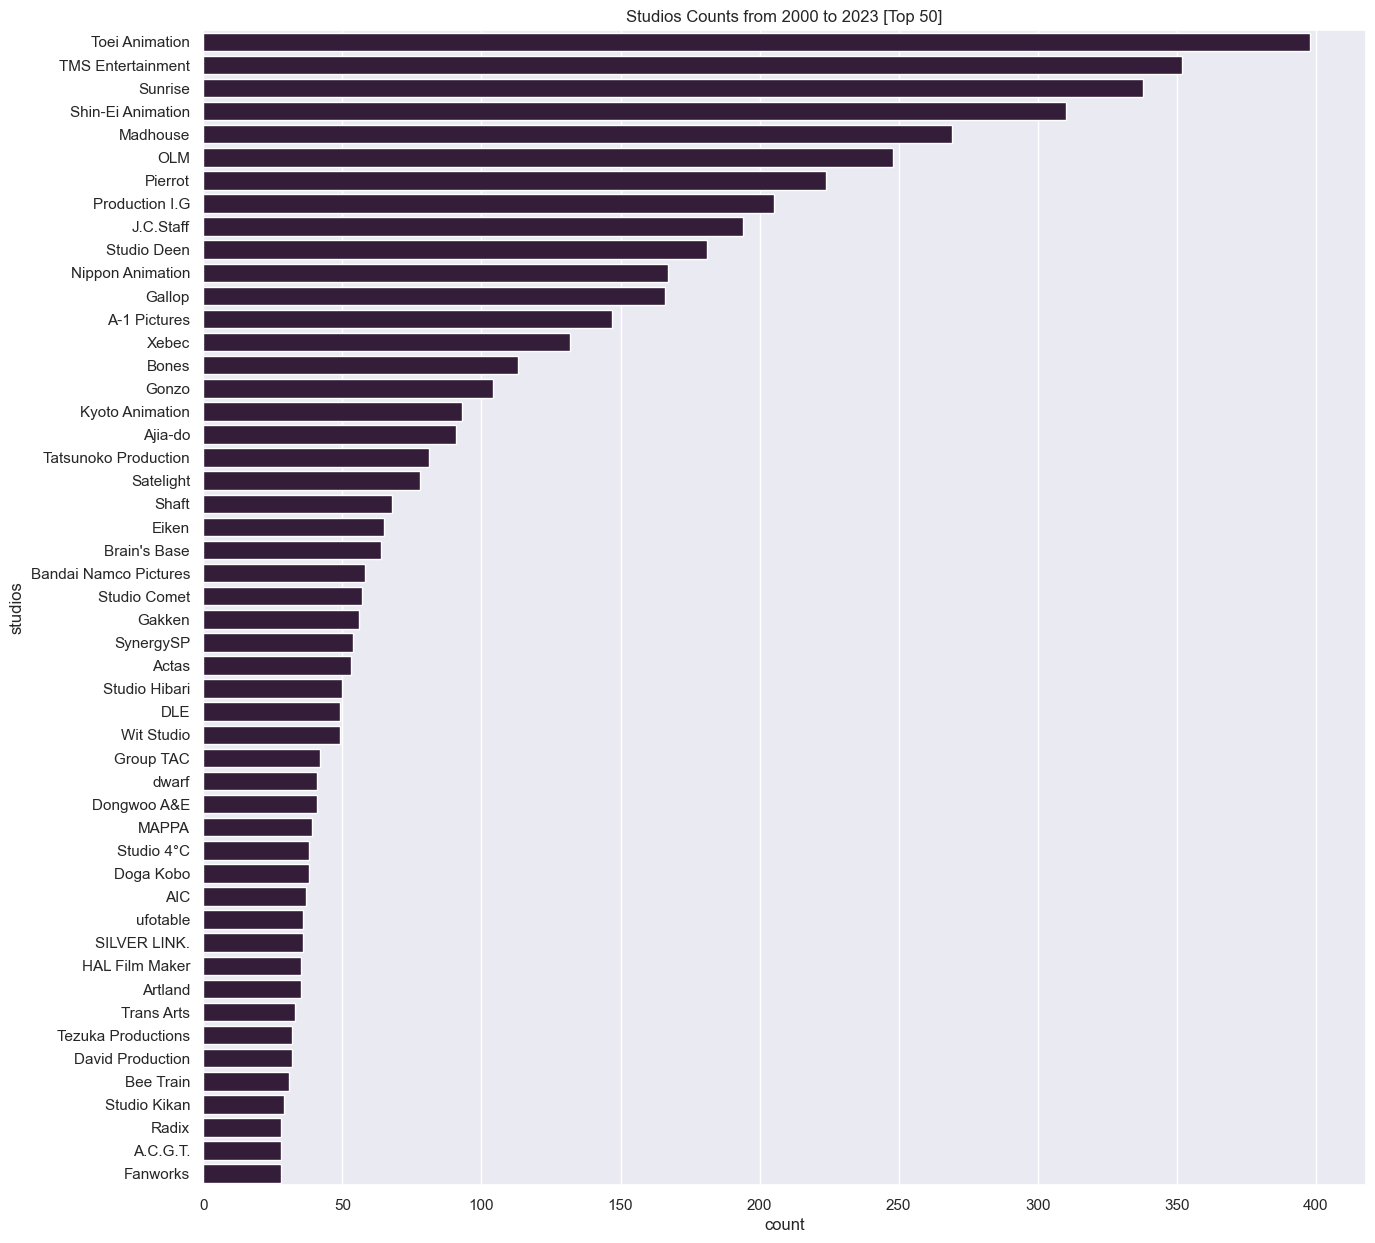

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 15))

# Apply the rocket theme
import seaborn as sb
sb.set_theme(style="darkgrid", palette="rocket")

# convert dict to dataframe
studios_df = pd.DataFrame(studios_dict.items())

# rename column names
studios_df.rename(columns={0: 'studios', 1: 'count'}, inplace=True)

# Reorder genre dataframe in descending order
studios_df = studios_df.sort_values(['count'], ascending=False).reset_index(drop=True)

# Make a barplot with the rocket color theme applied
sb.barplot(
    x="count", 
    y="studios", 
    data=studios_df.head(50), 
    estimator=sum, 
).set(title="Studios Counts from 2000 to 2023 [Top 50]");


#### Top 5 Studios

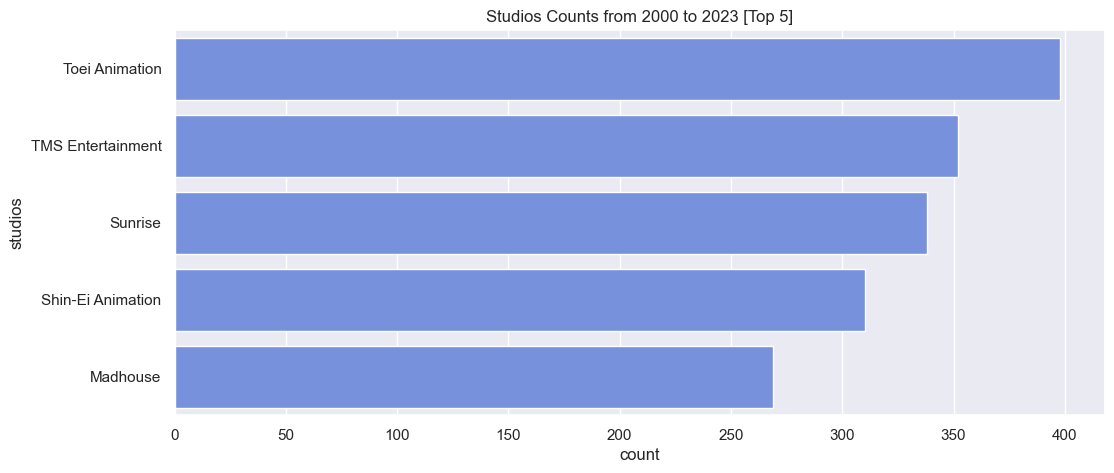

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 5))
sb.set_theme(style="darkgrid", palette="coolwarm")
# Make a barplot
sb.barplot(
    x="count", 
    y="studios", 
    data=studios_df.head(), 
    estimator=sum,  
).set(title="Studios Counts from 2000 to 2023 [Top 5]");

## Mean Rating

### mean rating of '-1'

In [42]:
# Convert 'mean' column to float
anime_df['mean'] = pd.to_numeric(anime_df['mean'], errors='coerce')

# Animes with ratings (mean >= 0)
positive_mean_df = anime_df[anime_df['mean'] >= 0].reset_index(drop=True)

# Animes with no ratings (mean == -1)
negative_mean_df = anime_df[anime_df['mean'] == -1].reset_index(drop=True)

# Display the first few rows of animes with no ratings
negative_mean_df.head()


,id,title,start_date,synopsis,mean,popularity,num_list_users,num_scoring_users,nsfw,media_type,...,start_season_year,start_season_season,statistics_watching,statistics_completed,statistics_on_hold,statistics_dropped,statistics_plan_to_watch,statistics_num_list_users,positive_viewership_fraction,negative_viewership_fraction
0,55285,Stray Sheep no Daibouken,1994-12-24,no_Synopsis,-1.0,22395,142,20,white,tv,...,1995.0,winter,8.0,40.0,4.0,25.0,65.0,142.0,0.7958,0.2042
1,52140,Hello Kitty-tachi to Utaou! Kodomo no Uta Best...,2000-02-19,no_Synopsis,-1.0,22473,139,23,white,music,...,2000.0,winter,18.0,52.0,6.0,25.0,38.0,139.0,0.7770,0.2230
2,57541,Dakedo I Love You,2000-02-01,Music video for the song Dakedo I Love You by ...,-1.0,26212,72,13,white,music,...,2000.0,winter,4.0,27.0,3.0,15.0,23.0,72.0,0.7500,0.2500
3,59206,"Yes, You",2000-02-04,"Music video for the song Yes, You by Reiko Yam...",-1.0,27455,48,4,white,music,...,2000.0,winter,0.0,12.0,3.0,17.0,16.0,48.0,0.5833,0.4167
4,48197,Mailloui Daemoheom,1999-11-26,no_Synopsis,-1.0,22175,152,26,white,tv,...,1999.0,fall,9.0,48.0,5.0,34.0,54.0,150.0,0.7400,0.2600


In [43]:
print('Animes without ratings:')
print(negative_mean_df['num_scoring_users'].describe())

print("---\n\nAnimes with ratings:")
print(positive_mean_df['num_scoring_users'].describe())

Animes without ratings:
count     71.000000
mean      56.211268
std       38.457738
min        3.000000
25%       22.500000
50%       60.000000
75%       84.500000
max      133.000000
Name: num_scoring_users, dtype: float64
---

Animes with ratings:
count    7.740000e+03
mean     9.325907e+04
std      2.803572e+05
min      1.030000e+02
25%      6.287500e+02
50%      4.015000e+03
75%      4.192625e+04
max      2.877072e+06
Name: num_scoring_users, dtype: float64


In [44]:
# combine the 2 dataframes
num_scoring_users_df = pd.DataFrame(np.log10(negative_mean_df['num_scoring_users'])).rename(
    columns={'num_scoring_users': 'num_scoring_users_negative'})

num_scoring_users_df['num_scoring_users_positive'] = np.log10(positive_mean_df['num_scoring_users'])

num_scoring_users_df.head()

,num_scoring_users_negative,num_scoring_users_positive
0,1.301030,6.145730
1,1.361728,3.890812
2,1.113943,3.868997
3,0.602060,5.472922
4,1.414973,5.624326


### Drop rows with no mean rating (i.e., '-1')

In [45]:
print('Number of rows before:', len(anime_df))
anime_df_cleaner = anime_df.drop(anime_df[anime_df['mean'] == -1].index).reset_index(drop=True)
print('Number of rows after:', len(anime_df_cleaner))

print('Lowest mean rating', min(anime_df_cleaner['mean']))

anime_df_cleaner.head(2)

Number of rows before: 7811
Number of rows after: 7740
Lowest mean rating 4.64


,id,title,start_date,synopsis,mean,popularity,num_list_users,num_scoring_users,nsfw,media_type,...,start_season_year,start_season_season,statistics_watching,statistics_completed,statistics_on_hold,statistics_dropped,statistics_plan_to_watch,statistics_num_list_users,positive_viewership_fraction,negative_viewership_fraction
0,21,One Piece,1999-10-20,Barely surviving in a barrel after passing thr...,8.72,17,2463199,1398717,white,tv,...,1999.0,fall,1746533.0,16.0,297039.0,195959.0,223517.0,2463064.0,0.7998,0.2002
1,3665,Ginga Eiyuu Densetsu Gaiden (1999),1999-12-24,Ginga Eiyuu Densetsu Gaiden (1999) is the seco...,8.06,4962,21077,7777,white,ova,...,1999.0,fall,983.0,9594.0,749.0,399.0,9347.0,21072.0,0.9455,0.0545


### source, media_type, nsfw, rating, genre, studios vs mean rating

In [46]:
# function to plot category against mean
def cat_mean_boxplot(cat, mean='mean', data=anime_df_cleaner):
    plt.figure(figsize=(15, 15))
    sorted_index = (data.groupby(cat)[[mean]].median().sort_values(
        by=mean, ascending=False).index)
    sb.boxplot(y=cat, x=mean, data=data, orient='h', order=sorted_index).set(
        title=f"{cat[0].upper() + cat[1:]} vs Mean Rating")

#### source vs mean

In [47]:
source_df = pd.DataFrame(anime_df_cleaner.groupby('source')[['mean']].mean().sort_values(by='mean', ascending=False).reset_index())
source_df

,source,mean
0,manga,7.476649
1,light_novel,7.442011
2,web_novel,7.427059
3,web_manga,7.197669
4,novel,7.177456
5,visual_novel,6.879615
6,mixed_media,6.827167
7,4_koma_manga,6.805625
8,game,6.743633
9,other,6.704466


[Text(0.5, 1.0, 'Source vs Mean Rating')]

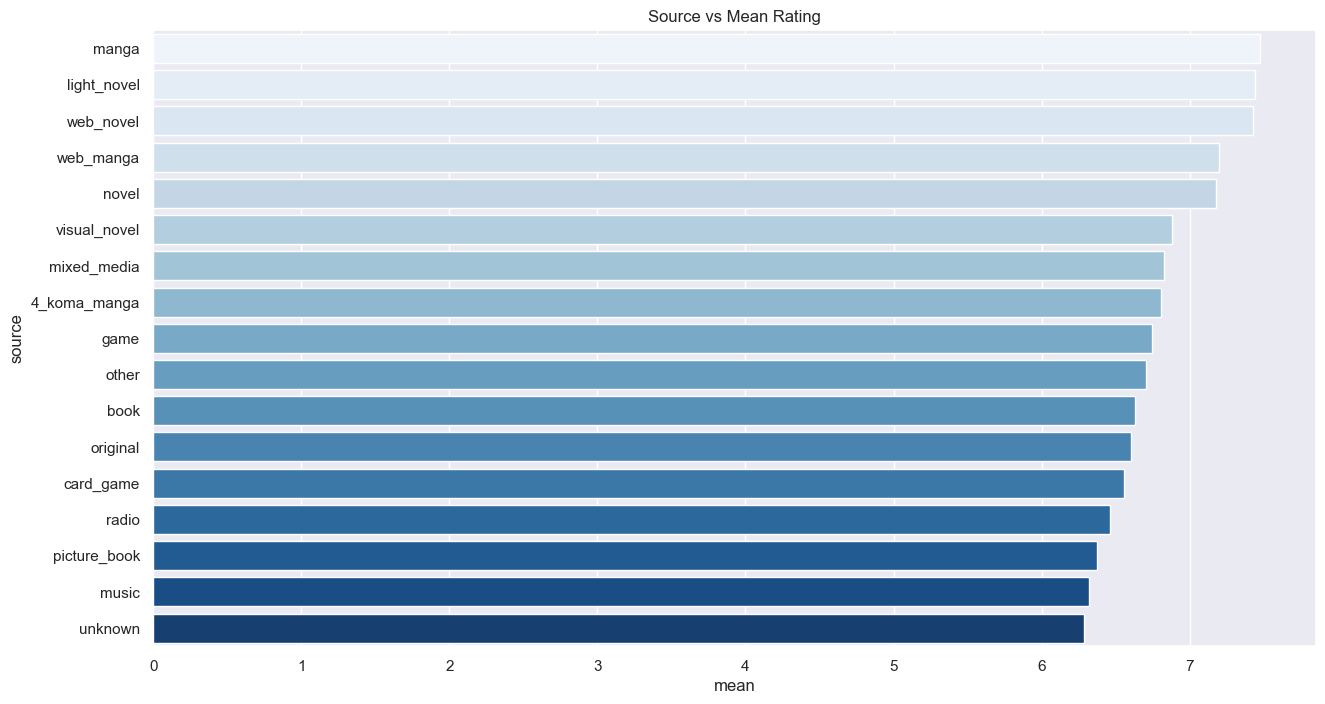

In [48]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Make a barplot with a color palette
sb.barplot(
    x="mean", 
    y="source", 
    data=source_df,
    palette="Blues"  # You can choose from a variety of palettes like 'Blues', 'viridis', 'coolwarm', etc.
).set(title="Source vs Mean Rating")


* `Web Novels` is a anime source that is very popular among viewers as these animes have a mean rating of 8.4, which is significantly more than that of other sources

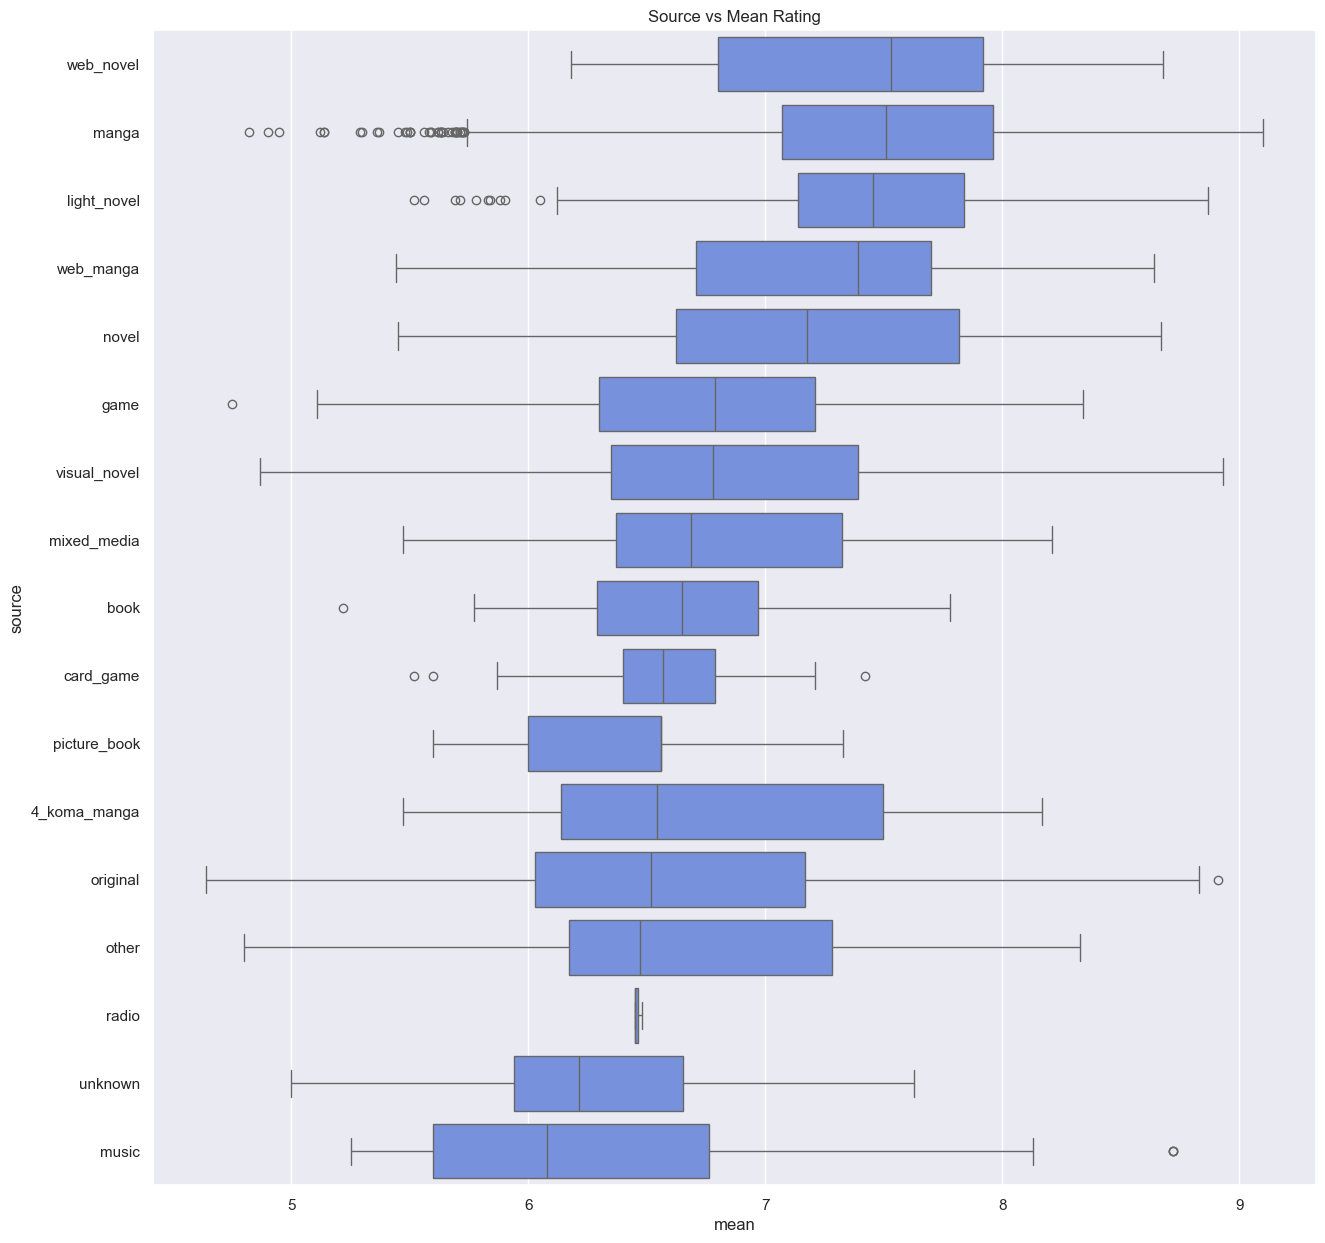

In [49]:
cat_mean_boxplot('source')

#### media_type vs mean rating

In [50]:
media_type_df = pd.DataFrame(anime_df_cleaner.groupby('media_type')[['mean']].mean().sort_values(by='mean', ascending=False).reset_index())
media_type_df

,media_type,mean
0,tv,7.207734
1,movie,7.104243
2,ova,6.975303
3,tv_special,6.793945
4,special,6.742821
5,ona,6.712200
6,pv,6.525306
7,music,6.340862
8,cm,6.070933


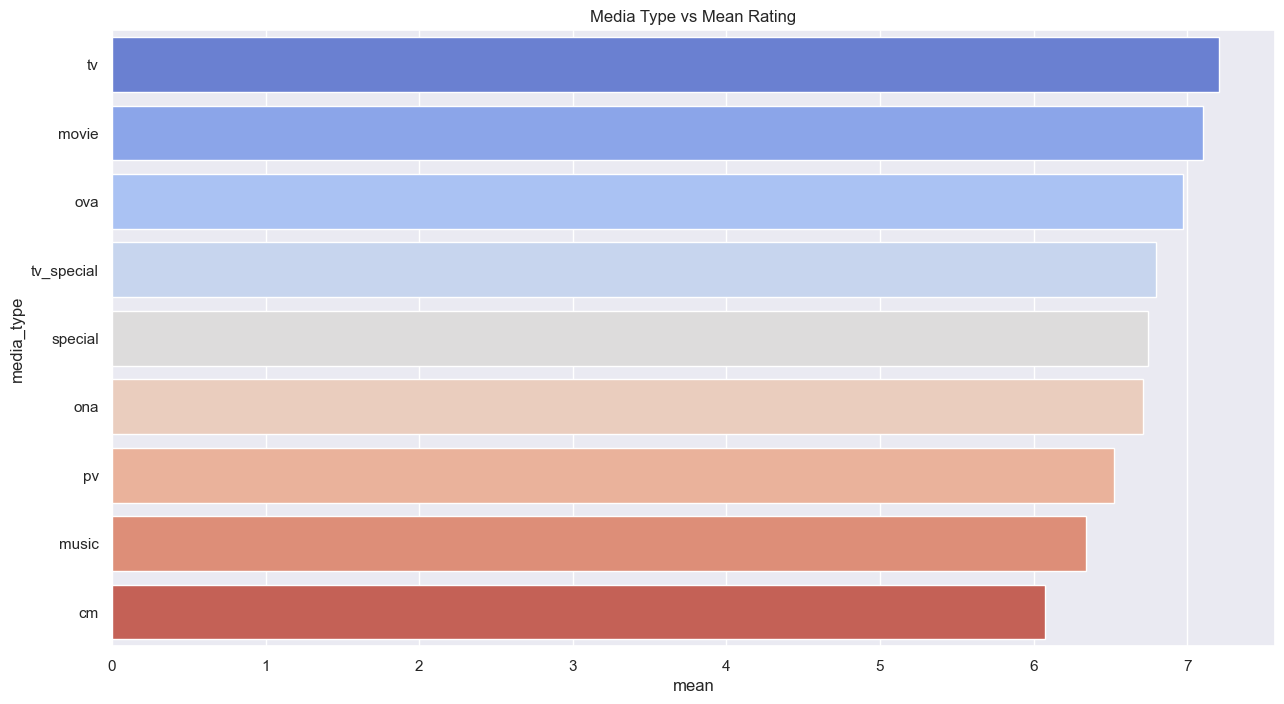

In [52]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Make a barplot
sb.barplot(
    x="mean", 
    y="media_type", 
    data=media_type_df,
    palette="coolwarm",
).set(title="Media Type vs Mean Rating");

* All media types generally have similar mean rating.

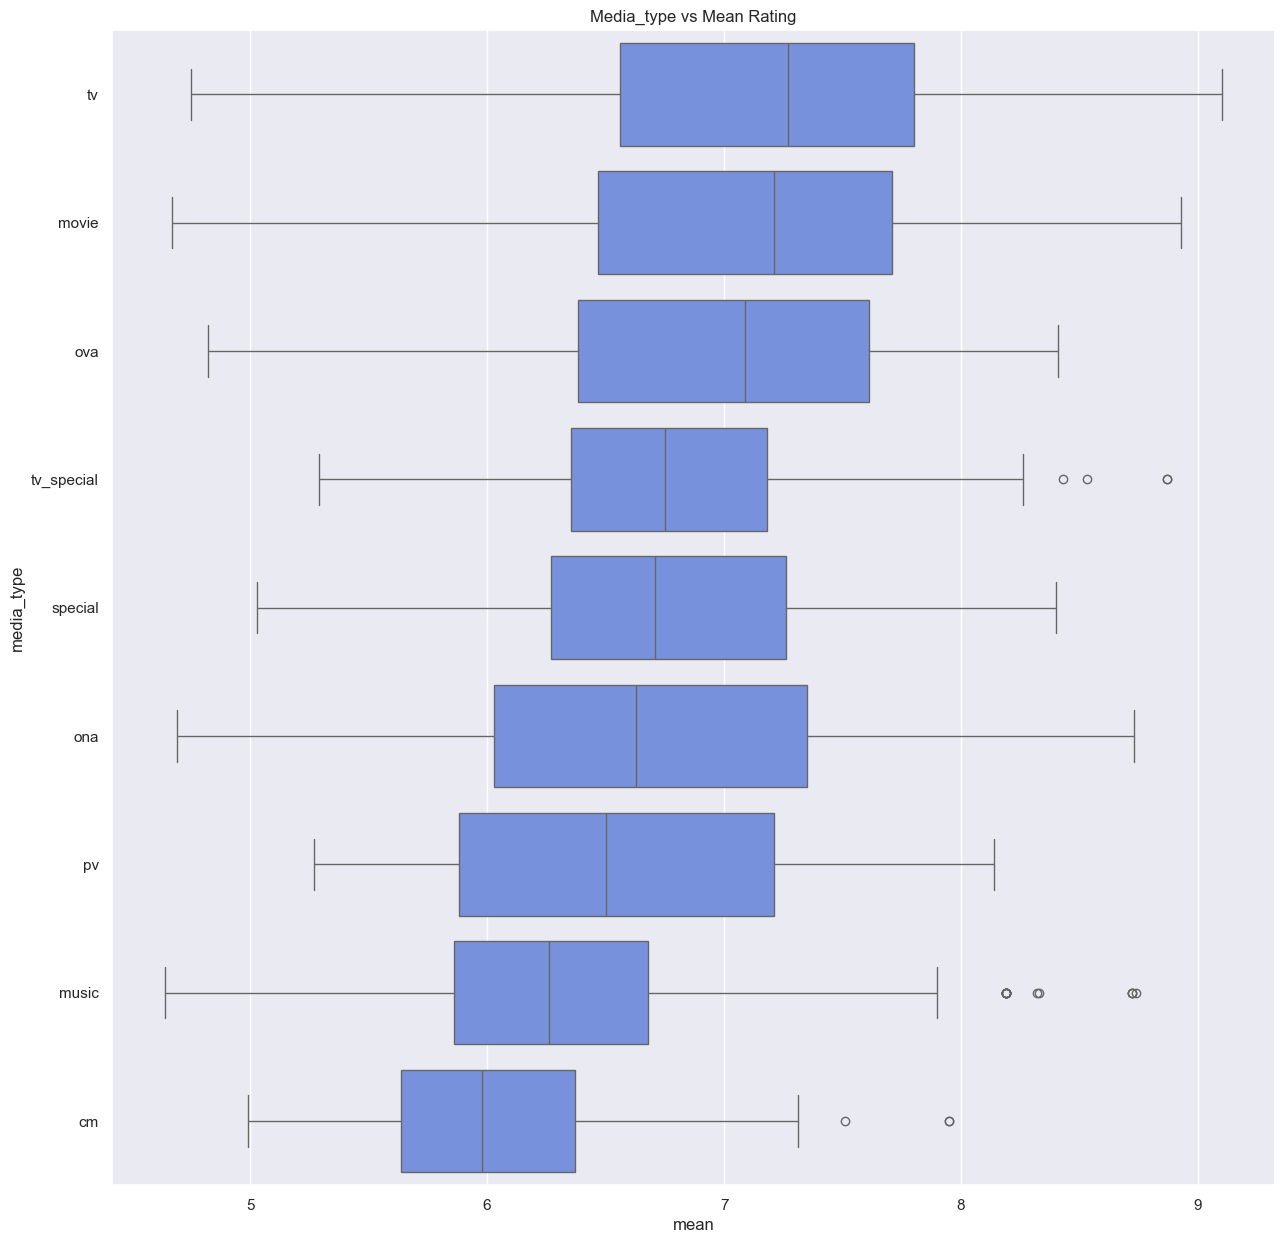

In [53]:
cat_mean_boxplot('media_type')

#### rating vs mean rating

In [54]:
rating_df = pd.DataFrame(anime_df_cleaner.groupby('rating')[['mean']].mean().sort_values(by='mean', ascending=False).reset_index())
rating_df

,rating,mean
0,r,7.567607
1,pg_13,7.224621
2,r+,7.065105
3,pg,6.737607
4,g,6.518610
5,no_rating,6.296452


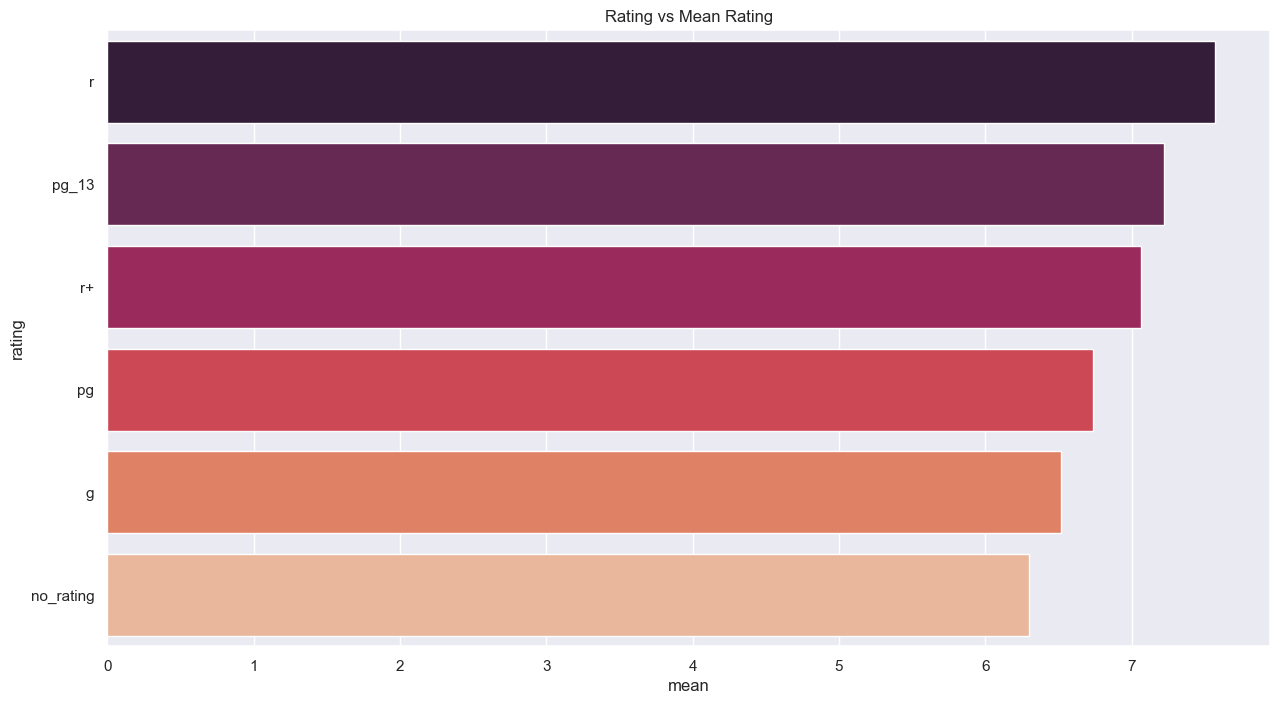

In [55]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Make a barplot
sb.barplot(
    x="mean", 
    y="rating", 
    data=rating_df,
    palette="rocket",
).set(title="Rating vs Mean Rating");

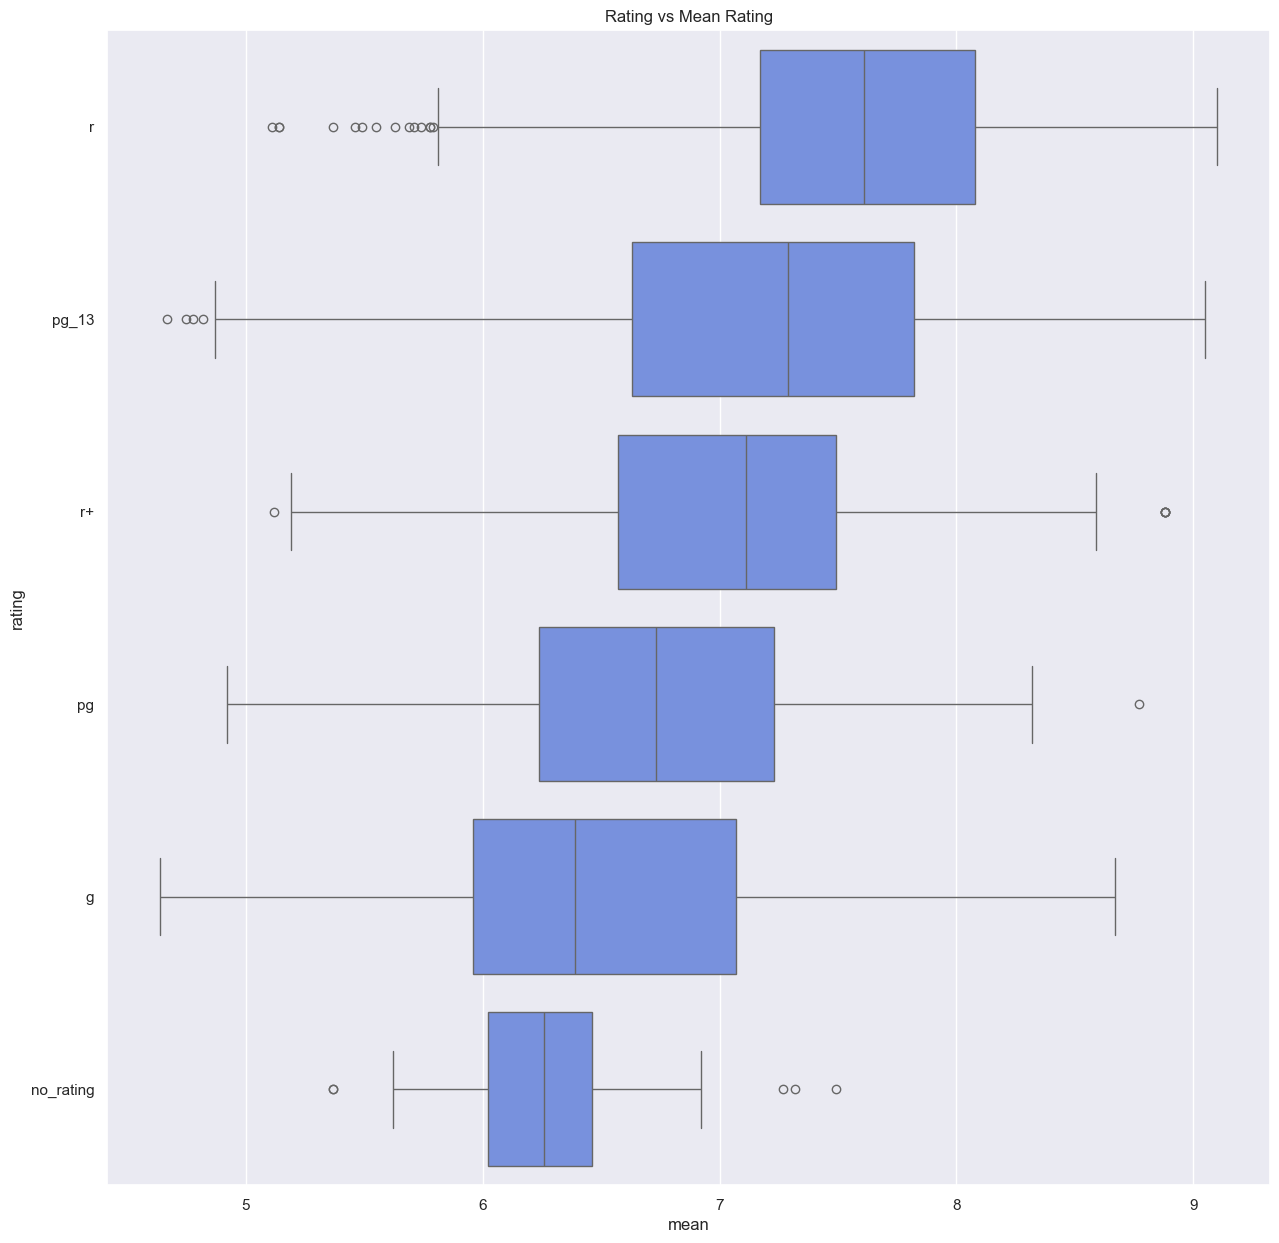

In [56]:
cat_mean_boxplot('rating')

#### genre vs mean rating

In [57]:
from collections import defaultdict
genres_mean_ratings_dict = defaultdict(float)
genres_total_ratings_dict = defaultdict(float)
genres_mean_ratings_count_dict = defaultdict(int)

for row in range(len(anime_df_cleaner)):
    for genre in anime_df_cleaner['genres'][row]:
        genre_name = genre['name']
        genres_total_ratings_dict[genre_name] += anime_df_cleaner['mean'][row]
        genres_mean_ratings_count_dict[genre_name] += 1
for genre, rating in genres_total_ratings_dict.items():
    genres_mean_ratings_dict[genre] = round(rating / genres_mean_ratings_count_dict[genre], 2)

In [58]:
# convert to dataframe
genres_mean_ratings_df = pd.DataFrame(genres_mean_ratings_dict.items())

# rename columns
genres_mean_ratings_df.rename(columns={0: "genre", 1: "mean"}, inplace=True)

# sort df in descending order
genres_mean_ratings_df = genres_mean_ratings_df.sort_values(by='mean', ascending=False).reset_index(drop=True)

genres_mean_ratings_df.head()

,genre,mean
0,Organized Crime,7.84
1,Delinquents,7.82
2,Love Polygon,7.80
3,Survival,7.77
4,Adult Cast,7.71


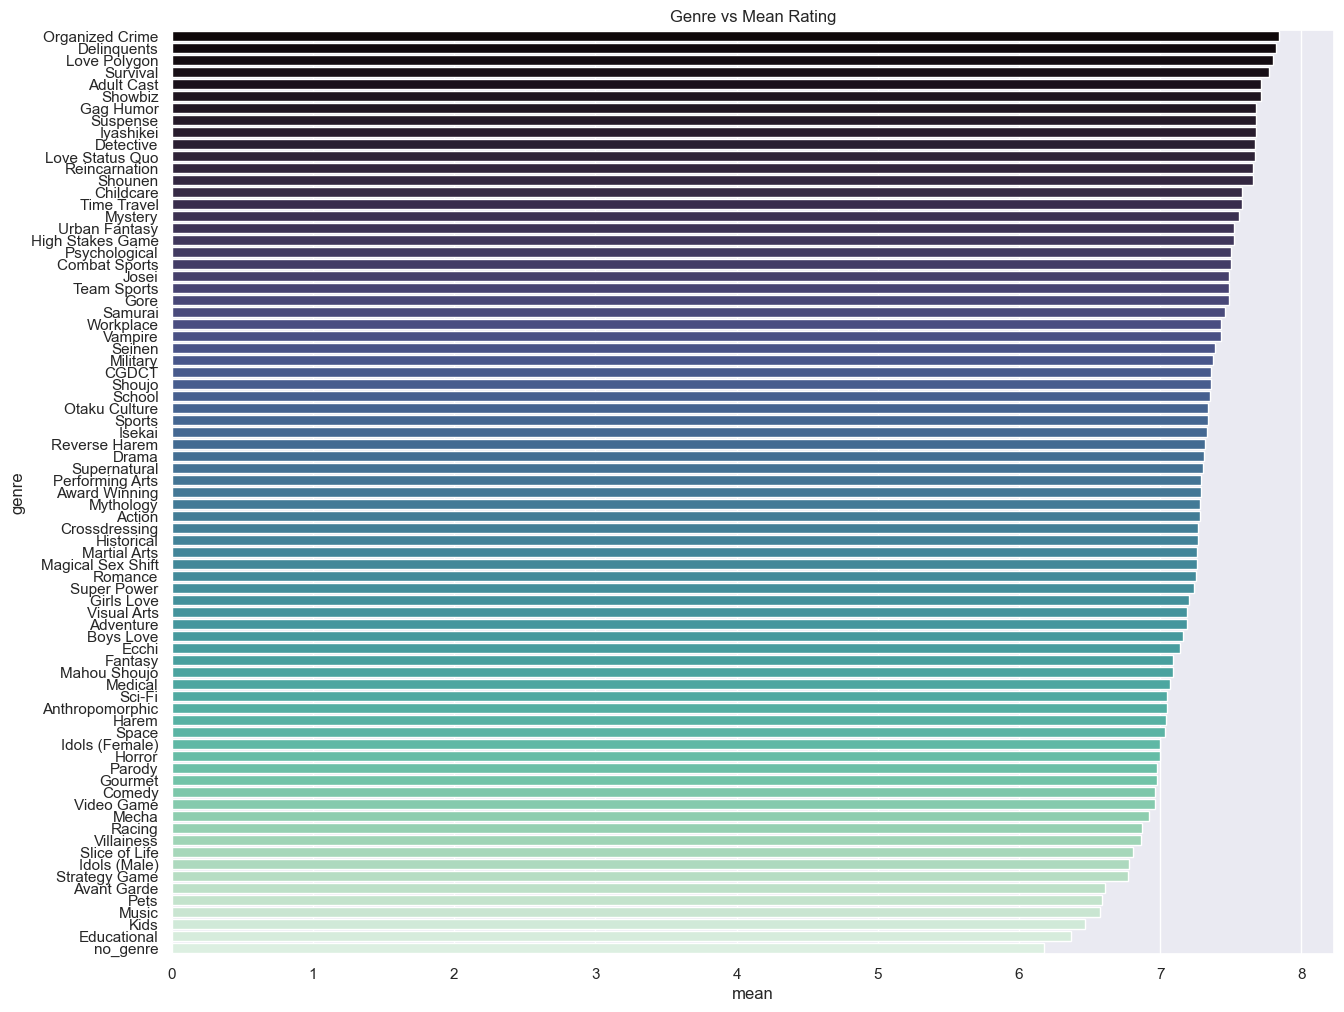

In [59]:
# Set the figure size
plt.figure(figsize=(15, 12))

# Make a barplot
sb.barplot(
    x="mean", 
    y="genre", 
    data=genres_mean_ratings_df,
    palette="mako",
).set(title="Genre vs Mean Rating");

#### studios vs mean rating

In [60]:
# create a dictionary of studios mean ratings
from collections import defaultdict
studios_mean_ratings_dict = defaultdict(float)
studios_total_ratings_dict = defaultdict(float)
studios_mean_ratings_count_dict = defaultdict(int)

for row in range(len(anime_df_cleaner)):
    for studio in anime_df_cleaner['studios'][row]:
        studio_name = studio['name']
        studios_total_ratings_dict[studio_name] += anime_df_cleaner['mean'][row]
        studios_mean_ratings_count_dict[studio_name] += 1

for studio, rating in studios_total_ratings_dict.items():
    studios_mean_ratings_dict[studio] = round(rating / studios_mean_ratings_count_dict[studio], 2)

In [61]:
# convert to dataframe
studios_mean_ratings_df = pd.DataFrame(studios_mean_ratings_dict.items())

# rename columns
studios_mean_ratings_df.rename(columns={0: "studio", 1: "mean"}, inplace=True)

# sort df in descending order
studios_mean_ratings_df = studios_mean_ratings_df.sort_values(by='mean', ascending=False).reset_index(drop=True)

studios_mean_ratings_df.head()

,studio,mean
0,Studio Signpost,8.81
1,LAN Studio,8.70
2,LICO,8.39
3,Egg Firm,8.31
4,Sharefun Studio,8.18


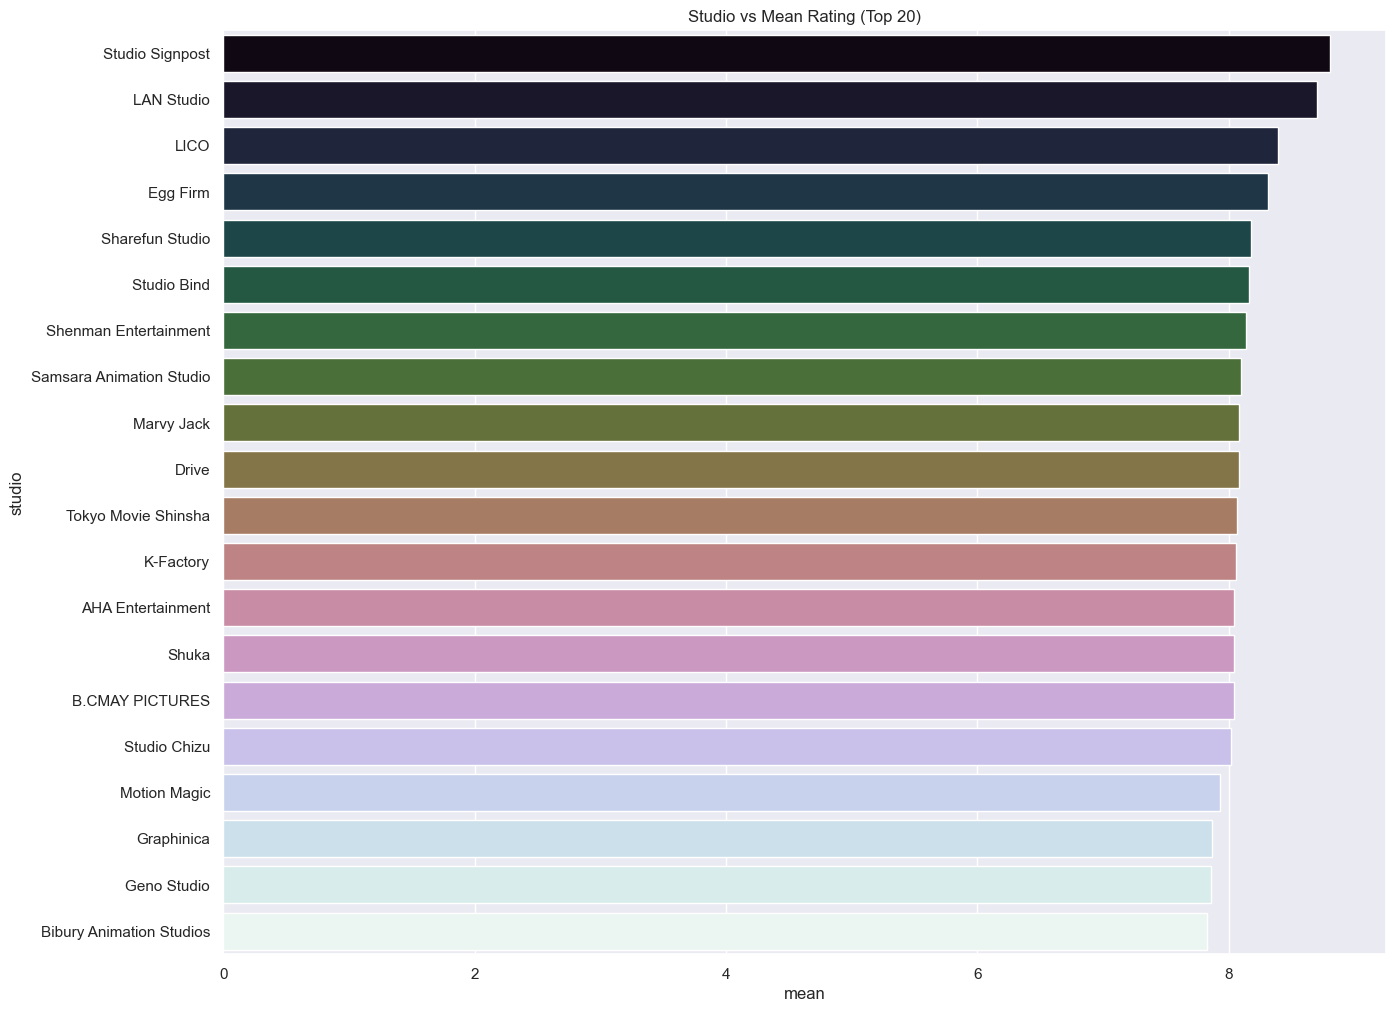

In [63]:
# Set the figure size
plt.figure(figsize=(15, 12))

# Make a barplot
sb.barplot(
    x="mean", 
    y="studio", 
    data=studios_mean_ratings_df.head(20),
    palette="cubehelix",
).set(title="Studio vs Mean Rating (Top 20)");

## Relationship between `mean`, `popularity`, `positive_viewership_fraction`, and `negative_viewership_fraction`

In [64]:
mean_rating = anime_df_cleaner['mean']
popularity = anime_df_cleaner['popularity']
positive_viewership_fraction = anime_df_cleaner['positive_viewership_fraction']
negative_viewership_fraction = anime_df_cleaner['negative_viewership_fraction']

# combine into one df
relationship_df = pd.DataFrame(mean_rating)

relationship_df['popularity'] = popularity
relationship_df['positive_viewership_fraction'] = positive_viewership_fraction
relationship_df['negative_viewership_fraction'] = negative_viewership_fraction

relationship_df.head()


,mean,popularity,positive_viewership_fraction,negative_viewership_fraction
0,8.72,17,0.7998,0.2002
1,8.06,4962,0.9455,0.0545
2,7.78,5063,0.8507,0.1493
3,8.42,373,0.9255,0.0745
4,8.68,218,0.9132,0.0868


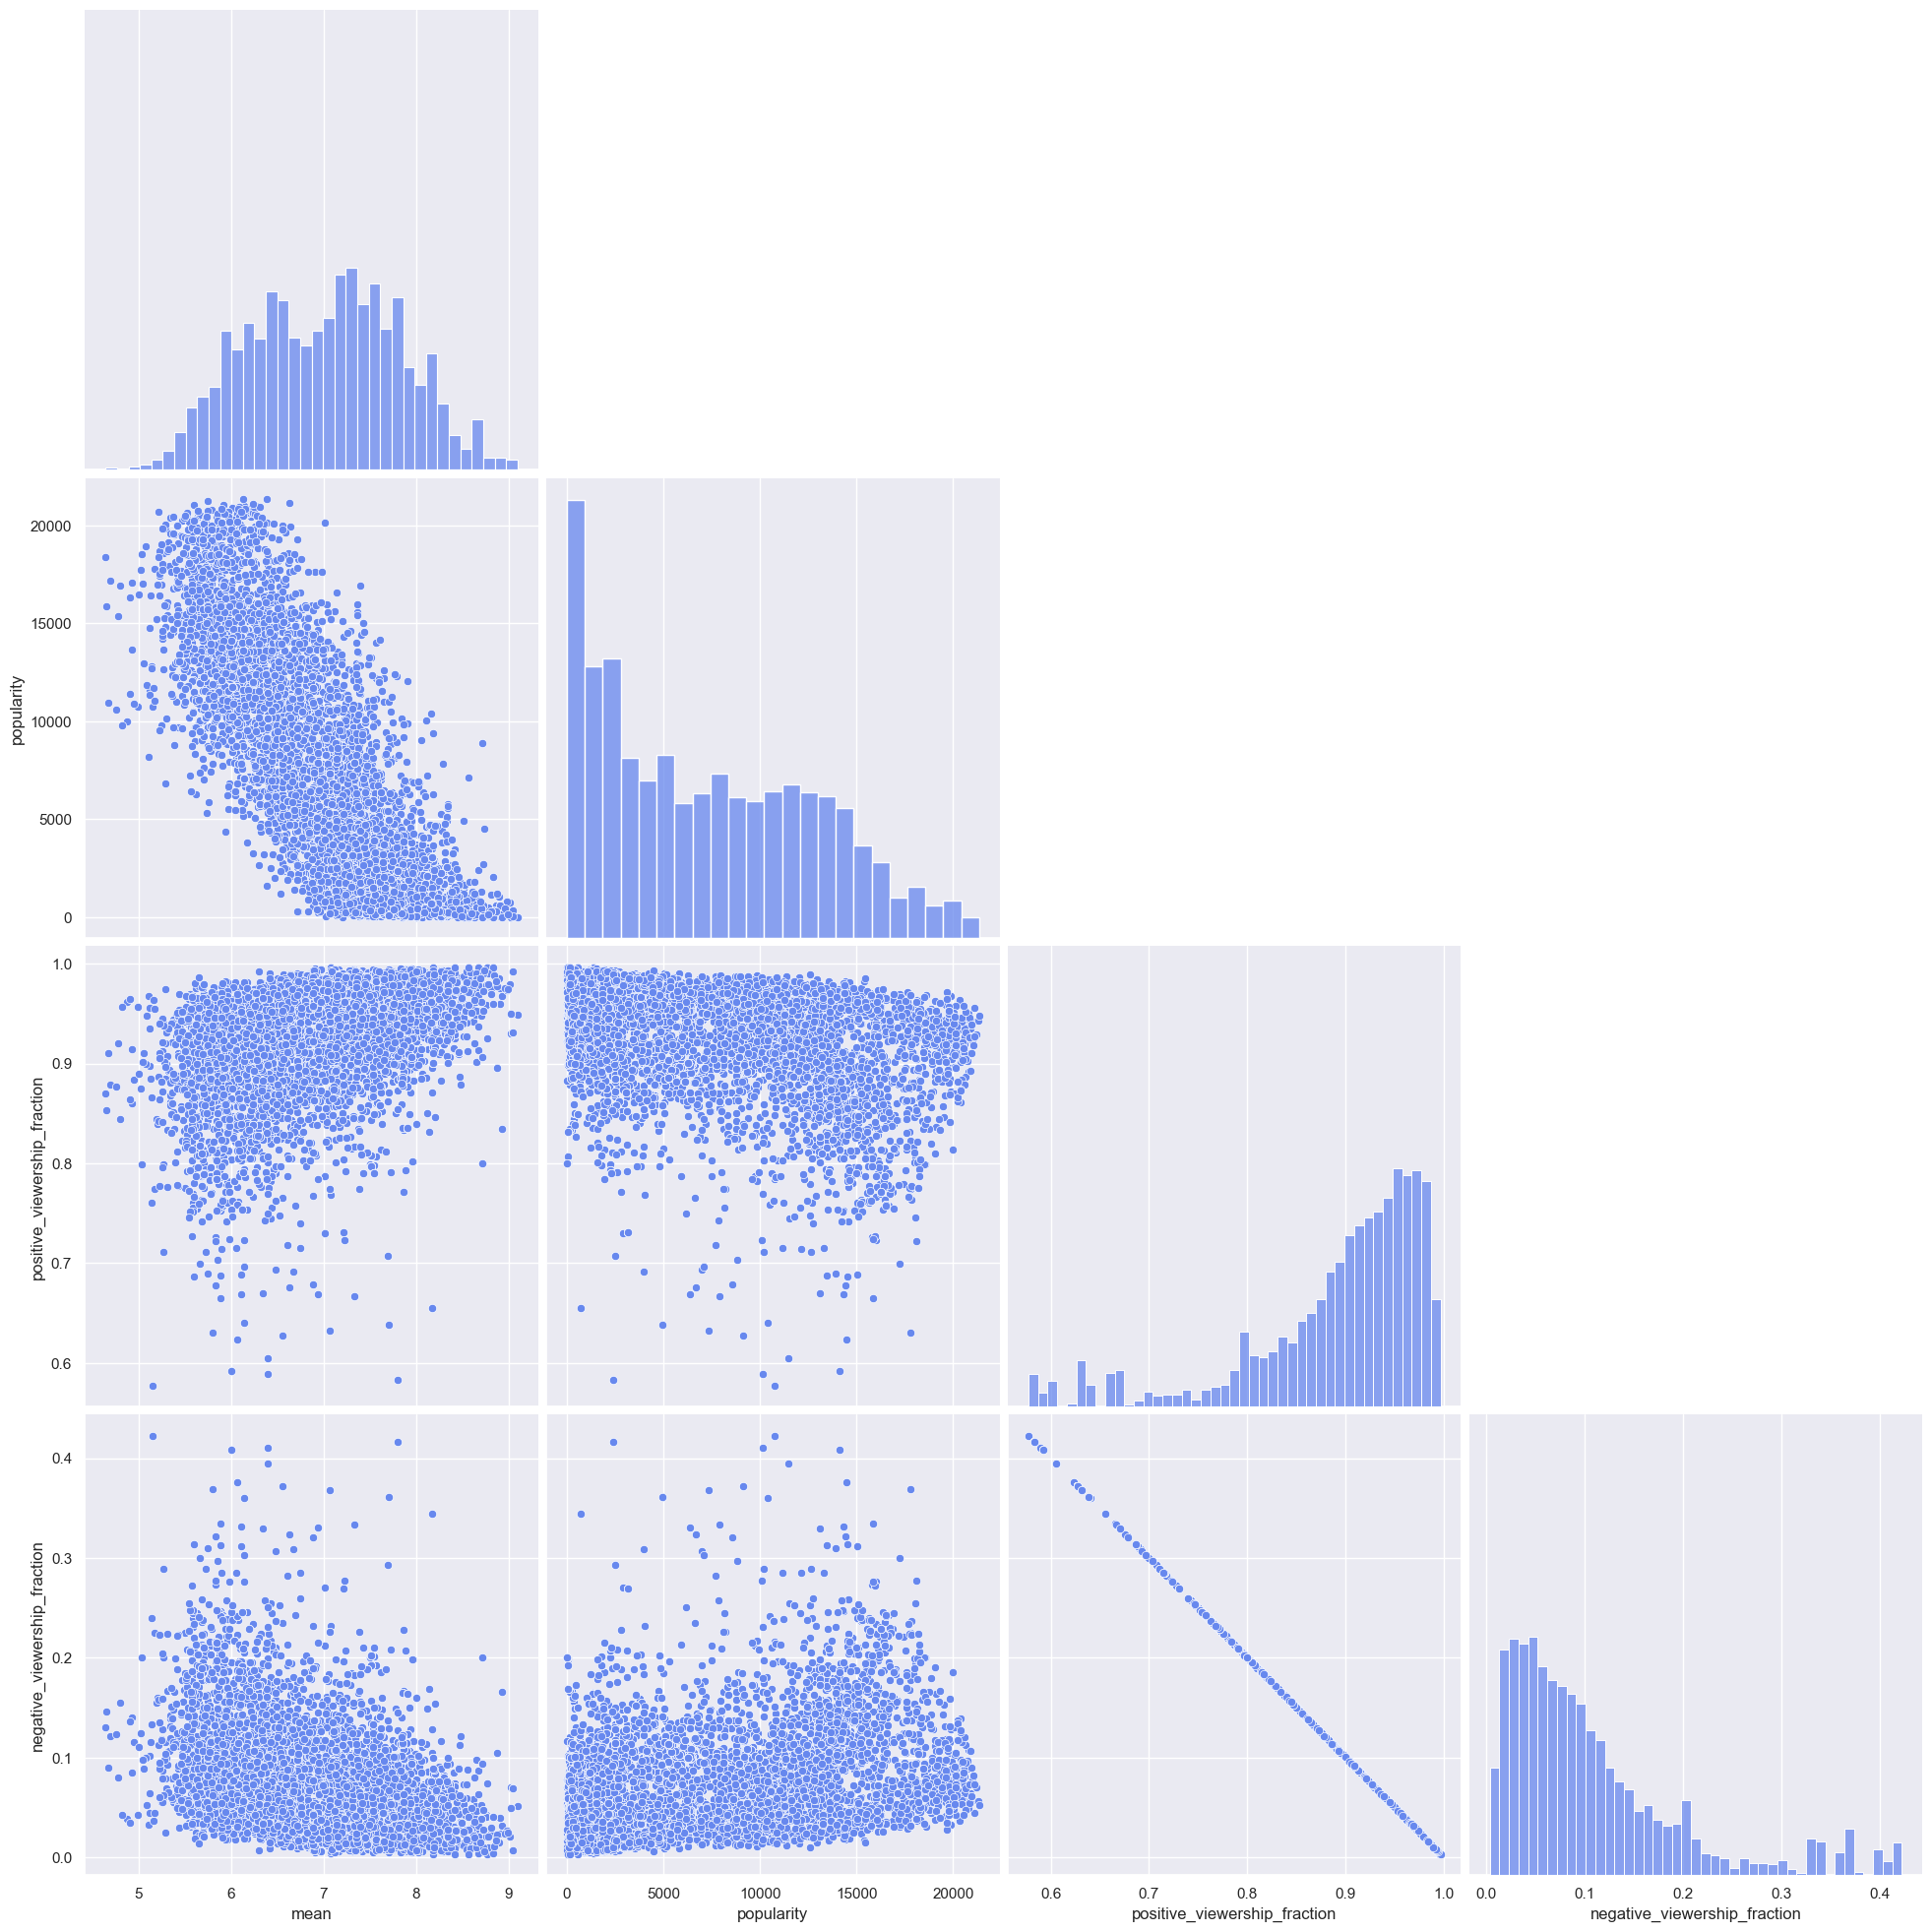

In [65]:
sb.pairplot(
    relationship_df, 
    kind="scatter", 
    height=5, 
    corner=True)

plt.show()

In [66]:
relationship_df.corr()

,mean,popularity,positive_viewership_fraction,negative_viewership_fraction
mean,1.000000,-0.813486,0.115915,-0.115915
popularity,-0.813486,1.000000,-0.131635,0.131635
positive_viewership_fraction,0.115915,-0.131635,1.000000,-1.000000
negative_viewership_fraction,-0.115915,0.131635,-1.000000,1.000000


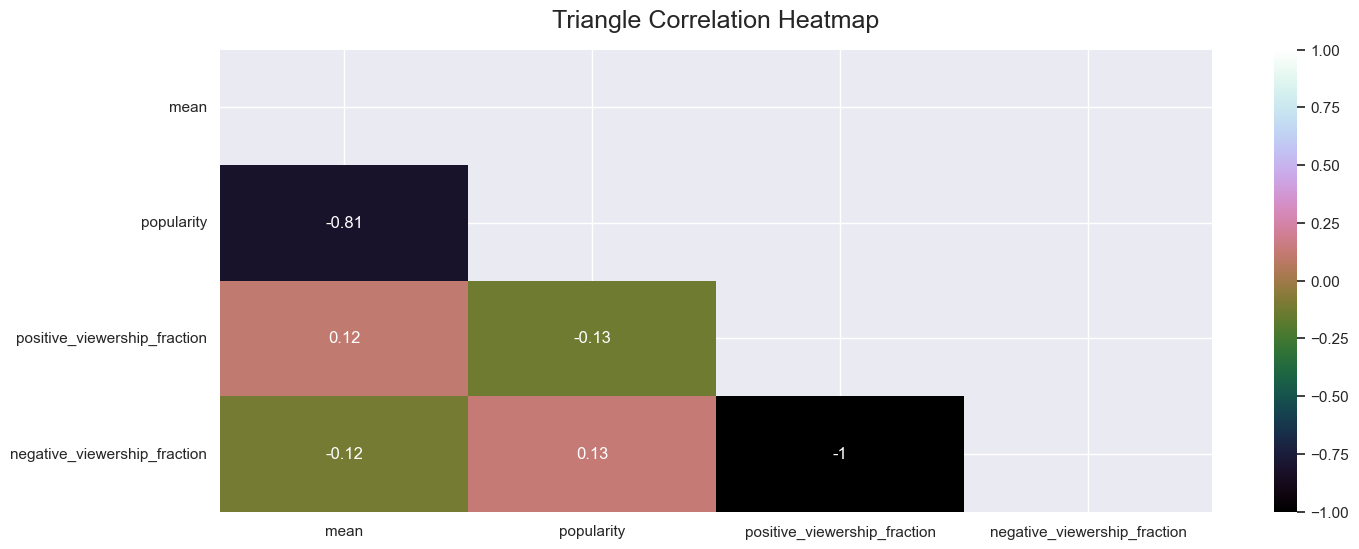

In [68]:
plt.figure(figsize=(16, 6))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(relationship_df.corr(), dtype=np.bool))
heatmap = sb.heatmap(relationship_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='cubehelix')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

## Overview Trend of `num_episodes` and `average_episode_duration`

#### Number of episodes over time

In [70]:
# Convert 'num_episodes' to numeric, coercing any non-numeric values to NaN
anime_df_cleaner['num_episodes'] = pd.to_numeric(anime_df_cleaner['num_episodes'], errors='coerce')

# Now, group by 'start_date' and calculate the mean of 'num_episodes'
start_date_num_episodes_df = pd.DataFrame(
    anime_df_cleaner.groupby('start_date')['num_episodes'].mean())

# Display the summary statistics
start_date_num_episodes_df.describe()


,num_episodes
count,3107.000000
mean,16.238998
std,71.961584
min,0.000000
25%,1.000000
50%,3.500000
75%,14.500000
max,1954.272727


In [71]:
cleaned_start_date_num_episodes_df = start_date_num_episodes_df[
    start_date_num_episodes_df['num_episodes'] != 0]
cleaned_start_date_num_episodes_df = cleaned_start_date_num_episodes_df.sort_values(by='start_date')
cleaned_start_date_num_episodes_df

,num_episodes
start_date,
1979-04-02,1787.000000
1991-12-21,10.000000
1993-12-13,726.000000
1994-10-03,1818.000000
1996-06-16,373.000000
...,...
2023-09-25,38.500000
2023-09-26,16.000000
2023-09-27,24.000000


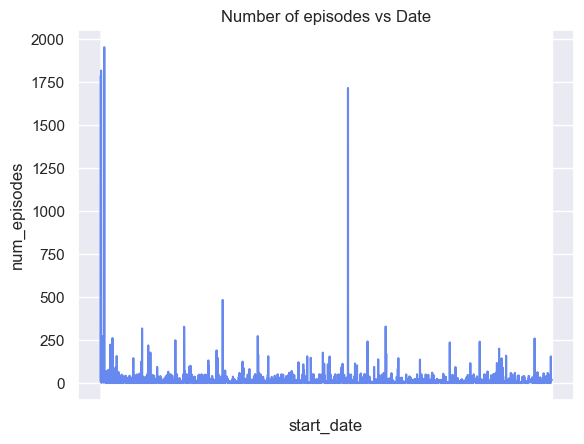

In [72]:
ax = sb.lineplot(x='start_date',
                 y='num_episodes',
                 data=cleaned_start_date_num_episodes_df)
ax.set(xlabel="start_date")
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
ax.set(title="Number of episodes vs Date")
plt.show()

* We remove the outliers

In [73]:
q3 = cleaned_start_date_num_episodes_df['num_episodes'].quantile(0.75)
q1 = cleaned_start_date_num_episodes_df['num_episodes'].quantile(0.25)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
cleaned_start_date_num_episodes_df = cleaned_start_date_num_episodes_df.loc[
    (cleaned_start_date_num_episodes_df['num_episodes'] >= lower_bound)
    & (cleaned_start_date_num_episodes_df['num_episodes'] <= upper_bound)]
print(f"Range: [{lower_bound}, {upper_bound}]")
cleaned_start_date_num_episodes_df

Range: [-20.0, 36.0]


,num_episodes
start_date,
1991-12-21,10.000000
1996-11-13,2.000000
1999-09-10,3.000000
1999-10,25.000000
1999-10-05,25.000000
...,...
2023-09-23,30.000000
2023-09-26,16.000000
2023-09-27,24.000000


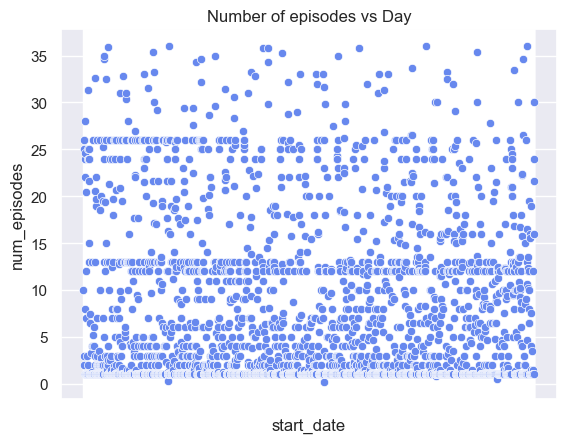

In [74]:
ax = sb.scatterplot(x='start_date',
                 y='num_episodes',
                 data=cleaned_start_date_num_episodes_df)
ax.set(xlabel="start_date")
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
ax.set(title="Number of episodes vs Day")
plt.show()

#### Group by month

In [75]:
# rename start_date from YYYY-MM-DD to YYYY-MM
cleaned_start_date_num_episodes_df = cleaned_start_date_num_episodes_df.rename(lambda date: '-'.join(date.split('-')[:2]))
month_start_date_num_episodes_df = pd.DataFrame(cleaned_start_date_num_episodes_df.groupby('start_date')['num_episodes'].mean())
month_start_date_num_episodes_df

,num_episodes
start_date,
1991-12,10.000000
1996-11,2.000000
1999-09,3.000000
1999-10,24.666667
1999-12,28.000000
...,...
2023-05,6.805556
2023-06,8.366667
2023-07,8.986364


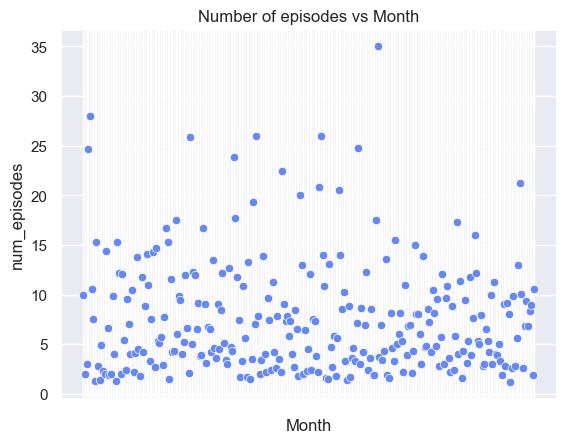

In [76]:
ax = sb.scatterplot(x='start_date',
                    y='num_episodes',
                    data=month_start_date_num_episodes_df)
ax.set(xlabel="Month")
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
ax.set(title="Number of episodes vs Month")
plt.show()

#### Group by year

In [77]:
# rename start_date from YYYY-MM-DD to YYYY
cleaned_start_date_num_episodes_df = cleaned_start_date_num_episodes_df.rename(
    lambda date: date.split('-')[0])
year_start_date_num_episodes_df = pd.DataFrame(
    cleaned_start_date_num_episodes_df.groupby('start_date')
    ['num_episodes'].mean())
year_start_date_num_episodes_df.head()

,num_episodes
start_date,
1991,10.000000
1996,2.000000
1999,22.375000
2000,6.594979
2001,8.072251


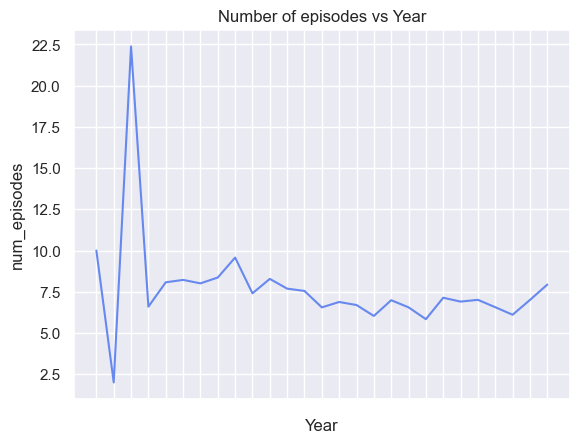

In [78]:
ax = sb.lineplot(x='start_date',
                    y='num_episodes',
                    data=year_start_date_num_episodes_df)
ax.set(xlabel="Year")
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
ax.set(title="Number of episodes vs Year")
plt.show()

### Trend of average_episode_duration over time

In [80]:
# Convert 'average_episode_duration' to numeric, forcing errors to NaN
anime_df_cleaner['average_episode_duration'] = pd.to_numeric(anime_df_cleaner['average_episode_duration'], errors='coerce')

# Now group by 'start_date' and calculate the mean
ep_duration_df = pd.DataFrame(
    anime_df_cleaner.groupby('start_date')['average_episode_duration'].mean())

# Check the summary statistics and sort the values
print(ep_duration_df.describe())
print(ep_duration_df.sort_values(by='average_episode_duration'))


       average_episode_duration
count               3107.000000
mean                1538.532276
std                 1539.429668
min                    0.000000
25%                  413.500000
50%                 1371.000000
75%                 1538.000000
max                 8505.000000
            average_episode_duration
start_date                          
2004-05-29                       0.0
2015-01-07                      15.0
2013-06-03                      15.0
2016-09-11                      15.0
2019-04-28                      16.0
...                              ...
2002-03-16                    8160.0
2010-02-18                    8160.0
2022-04-29                    8178.0
2018-05-26                    8400.0
2007-07-28                    8505.0

[3107 rows x 1 columns]


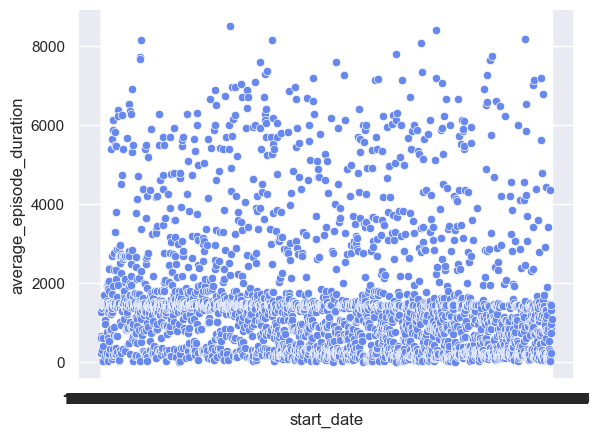

In [81]:
sb.scatterplot(x='start_date', y='average_episode_duration' , data=ep_duration_df)
ax.set(xlabel="start_date")
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
ax.set(title="Average episode duartion over time")
plt.show()

## start_season_season analysis

#### start_season_season vs mean

In [82]:
start_season_season_df = pd.DataFrame(anime_df_cleaner.groupby('start_season_season')[['mean']].mean().sort_values(by='mean', ascending=False).reset_index())
start_season_season_df

,start_season_season,mean
0,fall,7.044430
1,spring,7.016597
2,winter,6.996759
3,summer,6.936328


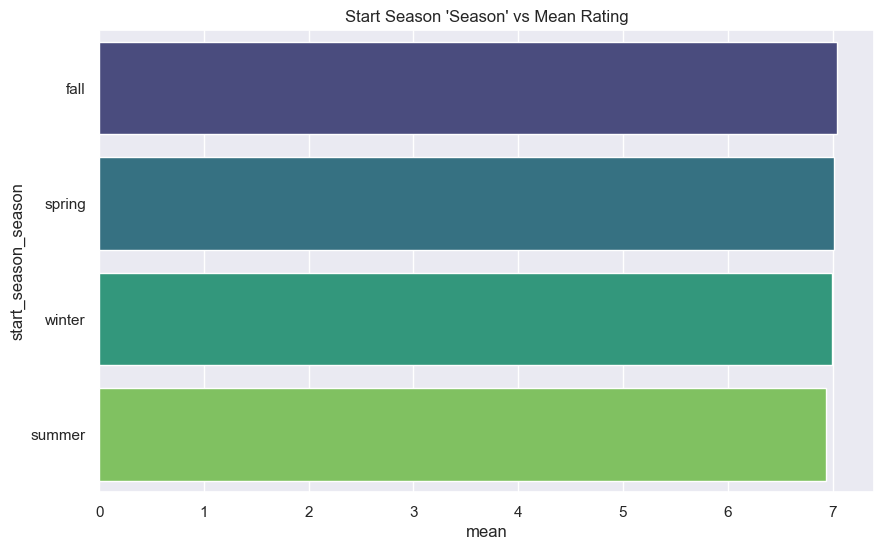

In [84]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Make a barplot
sb.barplot(
    x="mean", 
    y="start_season_season", 
    data=start_season_season_df,
    palette="viridis",
).set(title="Start Season 'Season' vs Mean Rating");

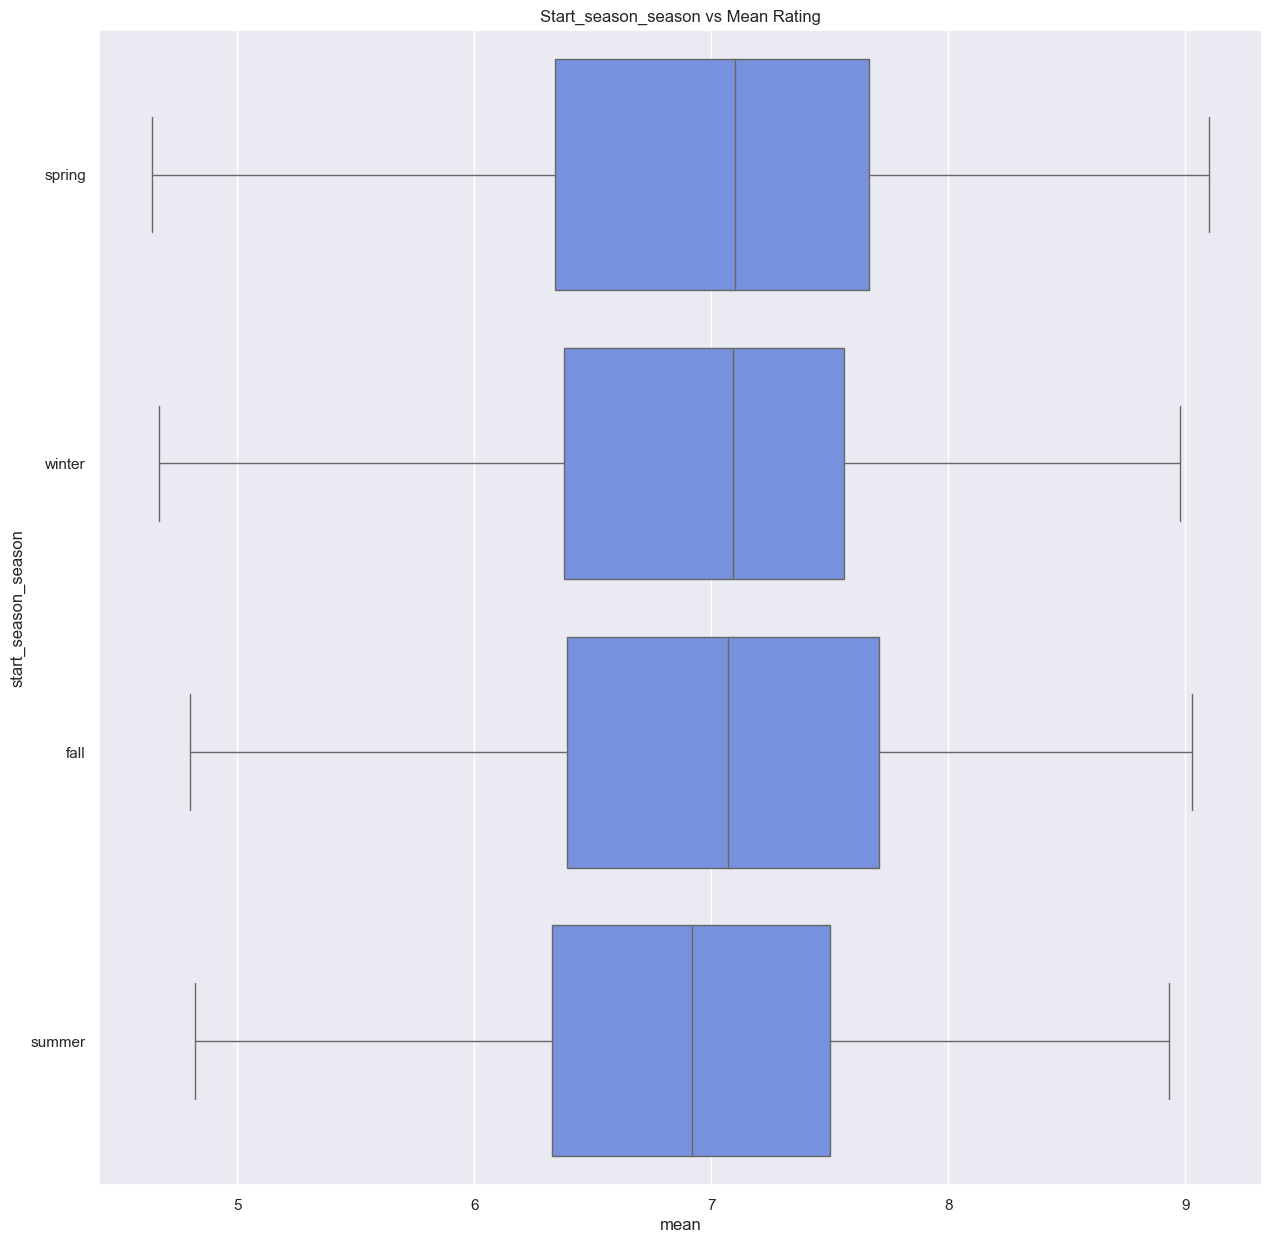

In [85]:
cat_mean_boxplot('start_season_season')

#### start_season_season vs genres

In [87]:
# Reset the index to handle non-continuous indices
anime_df = anime_df.reset_index(drop=True)

# Filter out rows with missing or invalid data in 'start_season_season' or 'genres'
anime_df = anime_df.dropna(subset=['start_season_season', 'genres'])

# Initialize a dictionary to store genre counts for each season
season_genres_dict = {
    'spring': defaultdict(int),
    'summer': defaultdict(int),
    'fall': defaultdict(int),
    'winter': defaultdict(int)
}

# Loop through the DataFrame rows
for idx, anime in anime_df.iterrows():
    season = anime['start_season_season']  # Extract season information
    for genre in anime['genres']:  # Loop through the genres for each anime
        # Skip animes with no genres (genre['id'] == -1)
        if genre['id'] == -1:
            continue
        
        genre_name = genre['name']  # Extract genre name
        season_genres_dict[season][genre_name] += 1  # Count the genre for the season

# Print the season genre counts
for season, genres in season_genres_dict.items():
    print(f"{season.capitalize()} season genre counts:")
    for genre, count in genres.items():
        print(f"  {genre}: {count}")
    print()

Spring season genre counts:
  Mystery: 155
  Shounen: 544
  Drama: 381
  Music: 367
  Romance: 327
  Shoujo: 129
  Showbiz: 17
  Comedy: 1296
  Kids: 418
  Ecchi: 128
  School: 404
  Seinen: 288
  Action: 726
  Adventure: 584
  Fantasy: 590
  Isekai: 71
  Mahou Shoujo: 50
  Award Winning: 43
  Mecha: 165
  Military: 97
  Sci-Fi: 476
  Space: 68
  Anthropomorphic: 144
  Detective: 52
  Adult Cast: 100
  Psychological: 68
  Suspense: 76
  Avant Garde: 23
  Parody: 120
  Childcare: 27
  Mythology: 84
  Historical: 180
  Medical: 6
  Samurai: 53
  Horror: 51
  Supernatural: 174
  Reincarnation: 12
  Iyashikei: 30
  Slice of Life: 215
  Performing Arts: 20
  Strategy Game: 99
  Super Power: 104
  Vampire: 21
  Gore: 31
  Pets: 21
  Harem: 47
  Idols (Female): 57
  Workplace: 39
  Sports: 118
  Team Sports: 60
  Gag Humor: 54
  Reverse Harem: 18
  Organized Crime: 20
  Martial Arts: 64
  Otaku Culture: 10
  Girls Love: 11
  High Stakes Game: 10
  Love Polygon: 20
  Racing: 22
  CGDCT: 30
  V

In [88]:
# function to plot top 3 genres for each season
def top_season_genres(season_genres_dict, season):
    return pd.DataFrame(season_genres_dict[season].items()).rename(columns={0: 'genre', 1: 'count'}).sort_values(by='count', ascending=False).reset_index(drop=True)

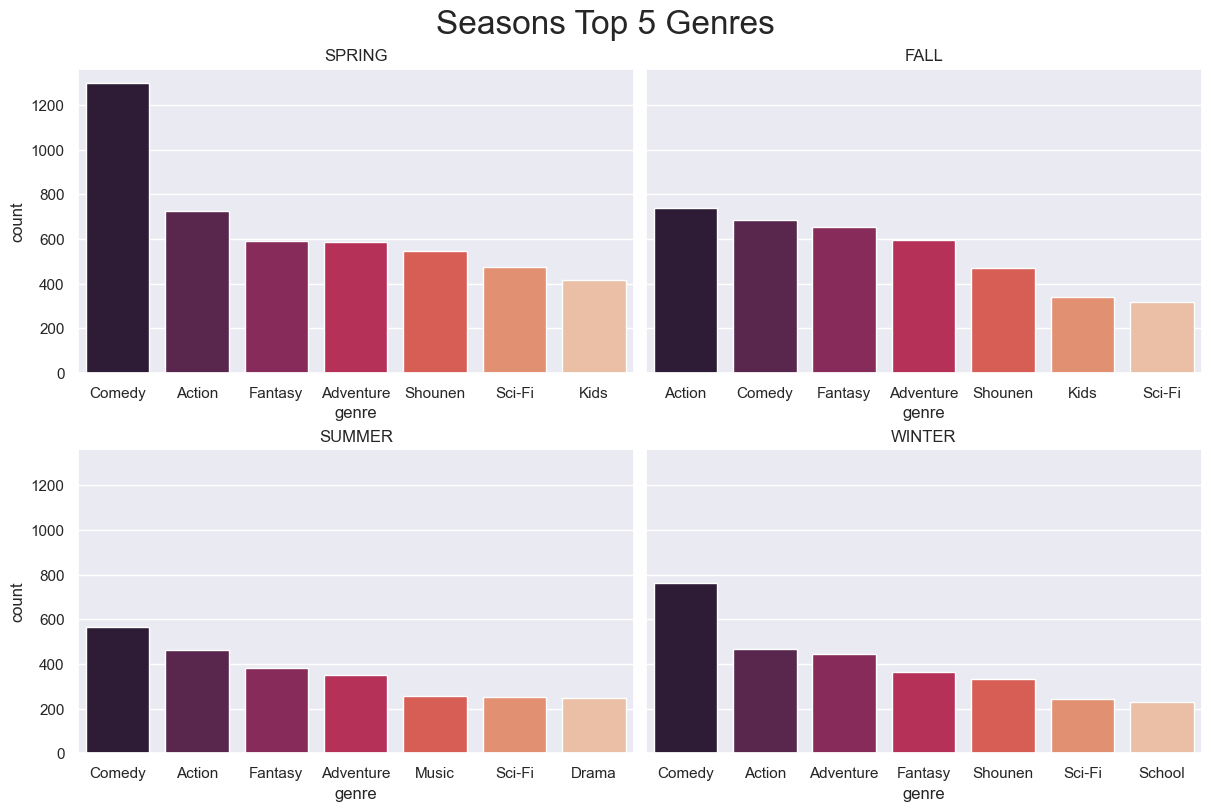

In [90]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharey=True, constrained_layout=True)
fig.suptitle('Seasons Top 5 Genres', fontsize=24)

x_index = 0
y_index = 0

for season in ['spring', 'summer', 'fall', 'winter']:
    # Make a barplot
    sb.barplot(
        ax=axs[x_index, y_index],
        x="genre", 
        y="count", 
        data=top_season_genres(season_genres_dict, season).head(7),
        palette="rocket"
    ).set(title=season.upper());
    
    # subplot ordering
    x_index += 1
    if x_index >= 2:
        x_index -= 2
        y_index += 1